![](https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site/main/images/notebooks_banner_withframe.png)

# Species Distribution Analysis - Environmental Data Preparation (Raster)

Author details: Xiang Zhao

Editor details: Dr Sebastian Lopez Marcano

Contact details: support\@ecocommons.org.au

Copyright statement: This script is the product of the EcoCommons platform. Please refer to the EcoCommons website for more details: <https://www.ecocommons.org.au/>

Date: January 2025

# Script and data info:

This notebook, developed by the EcoCommons team, showcases how to download, and process both continuous and categorical environmental datasets. The datasets are in the raster format and these are generally used to build Species Distribution Models (SDMs)

# Introduction

Raster data is a type of geo-spatial data represented by a grid of cells or pixels. Each cell contains a value representing information, such as temperature, elevation, land cover, or other spatially continuous variables. Raster data is commonly used in Geographic Information Systems (GIS) for analysing and visualizing spatial phenomena.

# Objectives

**Workflow Overview**:

-   Set the working directory and load the necessary R packages (`dismo`, `ggplot2`, `raster`, `googledrive`, `sp`, `dplyr`, `terra`). Create directories to store raw data files.

-   Data Download: Download continuous environmental and categorical environmental dataset (raster files) from our Google Drive.

-   Data Processing: Reproject the environmental dataset to the CRS (Coordinate Reference System) you desire / require. Crop and mask the environmental datasets to the extent of your study area. Resample the environmental datasets to a same resolution.

In the near future, this material may form part of comprehensive support materials available to EcoCommons users.

If you have any corrections or suggestions to improve the effeciengy, please [contact the EcoCommons](mailto:support@ecocommons.org.au) team.

![](https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site/main/images/EC_section_break.png)

# Introduction

## 1. Environmental variables

In Species Distribution Modeling (SDM), **environmental variables** are factors that influence where a species can live. These include:

-   **Climatic Variables**: Temperature, precipitation.

-   **Topographic Variables**: Elevation, slope.

-   **Soil Variables**: Soil, pH, texture.

-   **Vegetation Variables**: Land cover type, canopy cover.

-   **Hydrological Variables**: Distance to water bodies, soil moisture.

-   **Biotic Variables**: Presence of prey, competitors.

-   **Anthropogenic Variables**: Land use, human impact.

These variables help explain and predict a species' habitat suitability based on environmental conditions.

## 2. Raster

**Raster data** is a type of spatial data used to represent continuous surfaces, like environmental layers (e.g., elevation, temperature) in grids or cells. Each cell (pixel) has a value that represents information about that area.

**Important Characteristics**:

-   **Resolution**: Size of each cell, determining data detail (e.g., 10m x 10m cells).

-   **Extent**: Geographic area covered by the raster.

-   **Coordinate Reference System (CRS)**: Defines the spatial reference of the raster for location accuracy.

-   **Data Type**: Can be **continuous** (e.g., temperature) or **categorical** (e.g., land cover type).

These characteristics impact how raster data is interpreted and used in analyses like SDM.

To extract values from raster data or perform spatial analyses, it is crucial that all rasters have the **same resolution, extent**, and **coordinate reference system (CRS)**. This ensures that the data aligns correctly and avoids mismatches or errors during analysis.

Ideally, you should define a single CRS to be used consistently across all spatial files in a project, including shapefiles and raster files. This uniformity simplifies processing and ensures that all spatial data layers are accurately overlaid and compared.

Read "[What is raster data?](https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/what-is-raster-data.htm#:~:text=Rasters%20are%20digital%20aerial%20photographs,land%2Duse%20or%20soils%20data.)" by ArcMap for more detailed explanation.

## 3. Categorical and Continuous data

In environmental modeling, **environmental variables** can be classified as **categorical** or **continuous**:

**Categorical Data**

-   Represents discrete classes or categories.

-   **Examples**:

    -   **Land Cover Type**: Forest, grassland, urban.

    -   **Soil Type**: Sandy, clay, loam.

    -   **Vegetation Type**: Different plant communities.

**Continuous Data**

-   Represents data with a smooth gradient, measurable values.

-   **Examples**:

    -   **Temperature**: Annual mean temperature.

    -   **Precipitation**: Monthly or annual rainfall.

    -   **Elevation**: Height above sea level in meters.

Categorical data is useful for distinct classifications, while continuous data is used for variables that change gradually across the landscape. Both types are important for predicting species distributions.

![](https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site/main/images/EC_section_break.png)

# Set-up: R Environment and Packages

Some housekeeping before we start. This process might take some time as many packages needed to be installed.

## S.1 Set the working directory and create a folder for data.

Save the Quarto Markdown file (.QMD) to a folder of your choice, and then set the path to your folder as your working directory.


In [1]:
## {r setup_workspace}

# Set the workspace to the current working directory
# Uncomment and replace the path below with your own working directory if needed:

#setwd("/Users/zhaoxiang/Desktop/raster_preparation")

workspace <- getwd()  # Get the current working directory and store it in 'workspace'

# Increase the plot size by adjusting the options for plot dimensions in the notebook output
options(repr.plot.width = 16, repr.plot.height = 8)  # Sets width to 16 and height to 8 for larger plots



Ideally, you would use the **`renv`** package to create an isolated environment for installing all the required R packages used in this notebook. However, since installing **`renv`** and its dependencies can be time-consuming, we recommend trying this after the workshop.

In [2]:

## {r renv}

# # Ensure "renv" package is installed
# if (!requireNamespace("renv", quietly = TRUE)) {
#   install.packages("renv")
# }
# 
# # Check if renv has been initialized in the project
# if (!file.exists("renv/activate.R")) {
#   message("renv has not been initiated in this project. Initializing now...")
#   renv::init()  # Initialize renv if not already set up
# } else {
#   source("renv/activate.R")  # Activate the renv environment
#   message("renv is activated.")
# }
# 
# # Check for the existence of renv.lock and restore the environment
# if (file.exists("renv.lock")) {
#   message("Restoring renv environment from renv.lock...")
#   renv::restore()
# } else {
#   message("No renv.lock file found in the current directory. Skipping restore.")
# }


## S.2 Install and load essential libraries.

Install and load R packages. Terra and sf are essential for working with raster and vector data, respectively. Other packages like dplyr, ggplot2, and leaflet are useful for data manipulation, visualization, and interactive mapping.

In [3]:
## {r install_libraries, message=FALSE, warning=FALSE}

# Set CRAN mirror
options(repos = c(CRAN = "https://cran.rstudio.com/"))

# List of packages to check, install if needed, and load
packages <- c("dplyr", "terra", "sf", "googledrive", "ggplot2", "leaflet", "shiny", "htmltools")

# Function to display a cat message
cat_message <- function(pkg, message_type) {
  if (message_type == "installed") {
    cat(paste0(pkg, " has been installed successfully!\n"))
  } else if (message_type == "loading") {
    cat(paste0(pkg, " is already installed and has been loaded!\n"))
  }
}

# Install missing packages and load them
for (pkg in packages) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    install.packages(pkg)
    cat_message(pkg, "installed")
  } else {
    cat_message(pkg, "loading")
  }
  library(pkg, character.only = TRUE)
}

# De-authenticate Google Drive to access public files
drive_deauth()

# If you are using renv, you can snapshot the renv after loading all the packages.

#renv::snapshot()

dplyr is already installed and has been loaded!



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




terra is already installed and has been loaded!


terra 1.8.21



sf is already installed and has been loaded!


Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE



googledrive is already installed and has been loaded!
ggplot2 is already installed and has been loaded!
leaflet is already installed and has been loaded!
shiny is already installed and has been loaded!
htmltools is already installed and has been loaded!



## S.3 Download the Case Study Datasets

Environmental variables are downloaded from both WorldClim and Google Drive, and stored in GeoTIFF format.

In [5]:
## {r download_data}

# Define Google Drive file ID and the path for downloading
zip_file_id <- "1TD4WBLo7uzNjtWS2DXvS1PVCUzetxfqn" # Replace with the actual file ID of the zipped file

datafolder_path <- file.path(workspace)

# Create a local path for the zipped file
zip_file_path <- file.path(datafolder_path, "raster_preparation.zip")

# Function to download a file with progress messages
download_zip_file <- function(file_id, file_path) {
  cat("Downloading zipped file...\n")
  drive_download(as_id(file_id), path = file_path, overwrite = TRUE)
  cat("Downloaded zipped file to:", file_path, "\n")
}

# Create local directory if it doesn't exist
if (!dir.exists(datafolder_path)) {
  dir.create(datafolder_path, recursive = TRUE)
}

# Download the zipped file
cat("Starting to download the zipped file...\n")
download_zip_file(zip_file_id, zip_file_path)

# Unzip the downloaded file
cat("Unzipping the file...\n")
unzip(zip_file_path, exdir = datafolder_path)
cat("Unzipped files to folder:", datafolder_path, "\n")


Starting to download the zipped file...


File downloaded:

• rasters_files.zip <id: 1TD4WBLo7uzNjtWS2DXvS1PVCUzetxfqn>

Saved locally as:

• /Users/xiangzhaoqcif/Documents/Documents - QCIF’s MacBook Pro (2)/github/quick_fix/notebooks/notebooks/raster_preparation.zip



Downloaded zipped file to: /Users/xiangzhaoqcif/Documents/Documents - QCIF’s MacBook Pro (2)/github/quick_fix/notebooks/notebooks/raster_preparation.zip 
Unzipping the file...
Unzipped files to folder: /Users/xiangzhaoqcif/Documents/Documents - QCIF’s MacBook Pro (2)/github/quick_fix/notebooks/notebooks 


# 1. Load and Check Raster Files

## 1.1 Study area

Before processing raster or any other spatial data, it's important to understand your study area. This helps you determine the spatial extent of the environmental variables to collect, whether it's nationwide data (e.g., all of Australia) or localised data for a smaller area.

In [6]:
## {r study_area_crs}

# Load your shapefile
central_highlands <- st_read("rasters_files/central_highlands.shp")

#check the CRS of the vect of the study area
print(crs(central_highlands))


Reading layer `central_highlands' from data source 
  `/Users/xiangzhaoqcif/Documents/Documents - QCIF’s MacBook Pro (2)/github/quick_fix/notebooks/notebooks/rasters_files/central_highlands.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 4 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 144.9398 ymin: -38.20964 xmax: 146.4563 ymax: -36.97746
Geodetic CRS:  GDA94
[1] "GEOGCRS[\"GDA94\",\n    DATUM[\"Geocentric Datum of Australia 1994\",\n        ELLIPSOID[\"GRS 1980\",6378137,298.257222101,\n            LENGTHUNIT[\"metre\",1]]],\n    PRIMEM[\"Greenwich\",0,\n        ANGLEUNIT[\"degree\",0.0174532925199433]],\n    CS[ellipsoidal,2],\n        AXIS[\"geodetic latitude (Lat)\",north,\n            ORDER[1],\n            ANGLEUNIT[\"degree\",0.0174532925199433]],\n        AXIS[\"geodetic longitude (Lon)\",east,\n            ORDER[2],\n            ANGLEUNIT[\"degree\",0.0174532925199433]],\n    USAGE[\n        SCOPE[\"Horizontal componen

From above, we can find the CRS of the study area shapefile is EPSG:4283, the unit of it is 'degree'. To know more about this CRS, visit <https://epsg.io/4283>.

In [7]:
## {r study_area}

# Custom CSS for a smaller legend box
custom_css <- tags$style(HTML("
  .leaflet-control .legend {
    font-size: 8px !important; /* Reduce font size */
    padding: 4px; /* Reduce padding inside the legend box */
    line-height: 1; /* Reduce spacing between lines */
    width: auto; /* Automatically size the legend box */
    height: auto; /* Automatically size the legend box */
  }
  .leaflet-control .legend i {
    width: 10px; /* Smaller legend icons */
    height: 10px;
  }
"))

# Render the map
leaflet() %>%
  addProviderTiles(providers$Esri.WorldImagery) %>%
  # Add the Central Highlands layer with a distinct color
  addPolygons(
    data = central_highlands,
    color = "lightblue",         # Border color of Central Highlands polygon
    weight = 1,                  # Border width
    fillColor = "lightblue",     # Fill color of Central Highlands
    fillOpacity = 0.3,           # Transparency for fill
    group = "Central Highlands"
  ) %>%
  setView(lng = 145.7, lat = -37.5, zoom = 7) %>% # Set the view to desired location
  addLegend(
    position = "bottomright",
    colors = c("lightblue"),
    labels = c("Central Highlands"),
    opacity = 0.7
  ) %>%
  # Add the custom CSS to modify the legend font size
  htmlwidgets::prependContent(custom_css)

Warning message:
“sf layer has inconsistent datum (+proj=longlat +ellps=GRS80 +no_defs).
Need '+proj=longlat +datum=WGS84'”


HTML widgets cannot be represented in plain text (need html)

This light blue area called Central Highlands in Victoria, Australia is our study area.

## 1.2 Load Rasters

We prepared 15 environmental raster files for this practice.

| Variable name | Variables | Data Type | Resolution | Source |
|---------------|---------------|---------------|---------------|---------------|
| 1 - AusClim_bioclim_01_9s_1976-2005_vic | Bioclim 01: Annual mean temperature | Continuous | 9 seconds (9s) | 1976-2005, CSIRO via EcoCommons |
| 2 - AusClim_bioclim_04_9s_1976-2005_vic | Bioclim 04: Temperature Seasonality (standard deviation \*100) | Continuous | 9 seconds (9s) | 1976-2005, CSIRO via EcoCommons |
| 3 - AusClim_bioclim_06_9s_1976-2005_vic | Bioclim 06: Min Temperature of Coldest Month | Continuous | 9 seconds (9s) | 1976-2005, CSIRO via EcoCommons |
| 4 - AusClim_bioclim_10_9s_1976-2005_vic | Bioclim 10: Mean Temperature of Warmest Quarter | Continuous | 9 seconds (9s) | 1976-2005, CSIRO via EcoCommons |
| 5 - AusClim_bioclim_12_9s_1976-2005_vic | Bioclim 12: Annual Precipitation | Continuous | 9 seconds (9s) | 1976-2005, CSIRO via EcoCommons |
| 6 - AusClim_bioclim_18_9s_1976-2005_vic | Bioclim 18: Precipitation of Warmest Quarter | Continuous | 9 seconds (9s) | 1976-2005, CSIRO via EcoCommons |
| 7 - AusClim_bioclim_19_9s_1976-2005_vic | Bioclim 19: Precipitation of Coldest Quarter | Continuous | 9 seconds (9s) | 1976-2005, CSIRO via EcoCommons |
| 8 - AusClim_bioclim_20_9s_1976-2005_vic | Bioclim 20: Annual mean radiation | Continuous | 9 seconds (9s) | 1976-2005, CSIRO via EcoCommons |
| 9 - AusClim_bioclim_28_9s_1976-2005_vic | Bioclim 28: Annual mean moisture index | Continuous | 9 seconds (9s) | 1976-2005, CSIRO via EcoCommons |
| 10 - AusClim_bioclim_34_9s_1976-2005_vic | Bioclim 34: Mean moisture index of warmest quarter | Continuous | 9 seconds (9s) | 1976-2005, CSIRO via EcoCommons |
| 11 - AusClim_bioclim_35_9s_1976-2005_vic | Bioclim 35: Mean moisture index of coldest quarter | Continuous | 9 seconds (9s) | 1976-2005, CSIRO via EcoCommons |
| 12 - digital_elevation_model_3s_2009_3s_vic | Digital Elevation Model | Continuous | 3 seconds (3s) | Geoscience Australia via EcoCommons |
| 13 - Fire_events_projection_area_vic | Fires | Continuous | 1 km | Vic DEECA spatial data and resources |
| 14 - Logging_1km_vic | Logging | Continuous | 1 km | Vic DEECA spatial data and resources |
| 15 - nsg-2011-250m_asc_vic | Australian Soil Classification | Categorical | 250 m | Tern via EcoCommons |

Usually, you are the person who collects raster files from different data platform or other researchers. Apart from the content of the raster, you should know the **data type** (categorical or continuous), **resolution** (units in degree or meter/kilometers), and **Coordinate Reference System (**CRS, which also determines the unit of the raster**)**.

In [8]:
## {r load_rasters}

# Define the folder path
datafolder_path <- "rasters_files"

# List all .tif files with full paths
file_paths <- list.files(path = datafolder_path, pattern = "\\.tif$", full.names = TRUE)

# Load all rasters and store in a list
rasters <- lapply(file_paths, rast)

# Assign names to the raster list using file names without extensions
names(rasters) <- tools::file_path_sans_ext(basename(file_paths))

# Print numbers before each raster name
for (i in seq_along(names(rasters))) {
  cat(i, "-", names(rasters)[i], "\n")
}

1 - AusClim_bioclim_01_9s_1976-2005_vic 
2 - AusClim_bioclim_04_9s_1976-2005_vic 
3 - AusClim_bioclim_06_9s_1976-2005_vic 
4 - AusClim_bioclim_10_9s_1976-2005_vic 
5 - AusClim_bioclim_12_9s_1976-2005_vic 
6 - AusClim_bioclim_18_9s_1976-2005_vic 
7 - AusClim_bioclim_19_9s_1976-2005_vic 
8 - AusClim_bioclim_20_9s_1976-2005_vic 
9 - AusClim_bioclim_28_9s_1976-2005_vic 
10 - AusClim_bioclim_34_9s_1976-2005_vic 
11 - AusClim_bioclim_35_9s_1976-2005_vic 
12 - digital_elevation_model_3s_2009_3s_vic 
13 - Fire_events_projection_area_vic 
14 - Logging_1km_vic 
15 - nsg-2011-250m_asc_vic 


Now, let's check the data type of each raster.

In [9]:
## {r data_type}

# Check if each raster is categorical or continuous
for (i in seq_along(rasters)) {
  if (is.factor(rasters[[i]])) {
    cat(names(rasters[[i]]), "is categorical.\n")
  } else {
    cat(names(rasters[[i]]), "is continuous.\n")
  }
}


AusClim_bioclim_01_9s_1976-2005 is continuous.
AusClim_bioclim_04_9s_1976-2005 is continuous.
AusClim_bioclim_06_9s_1976-2005 is continuous.
AusClim_bioclim_10_9s_1976-2005 is continuous.
AusClim_bioclim_12_9s_1976-2005 is continuous.
AusClim_bioclim_18_9s_1976-2005 is continuous.
AusClim_bioclim_19_9s_1976-2005 is continuous.
AusClim_bioclim_20_9s_1976-2005 is continuous.
AusClim_bioclim_28_9s_1976-2005 is continuous.
AusClim_bioclim_34_9s_1976-2005 is continuous.
AusClim_bioclim_35_9s_1976-2005 is continuous.
digital_elevation_model_3s_2009_3s is continuous.
Fire_events_projection_area is continuous.
Logging_1km is continuous.
nsg-2011-250m_asc is continuous.


Australian Soil Classification (nsg-2011-250m_asc_vic) should be categorical, however, it is shown as continuous. Why is that? Here are some possible reasons:

-   **Incorrect Data Type Interpretation**:

    -   The software or library you are using may be interpreting the soil classification values as continuous numbers instead of categories (factors or levels).

-   **Raster Encoding**:

    -   Categorical data in raster format is typically stored with integer values representing categories. If the raster metadata does not correctly define these as categories, the software may interpret them as continuous.

-   **Missing Attribute Table**:

    -   Categorical rasters often have an attribute table linking integer values to class names. If this table is missing or not recognized, the values may appear as continuous.

-   **Data Export or Conversion Issue**:

    -   If the raster was exported or converted incorrectly (e.g., saved as a floating-point raster), it could cause the values to be treated as continuous.

Sometimes, after manipulation, a raster may lose its categorical (factor) properties due to how terra (the R package) or other spatial libraries interpret the file upon reloading. Rasters saved as categorical may be stored with integer values rather than explicit factor levels in the file, meaning they need to be redefined as factors when reloaded.

In [10]:
## {r factorize}

# we can factorize Australian Soil Classification (nsg-2011-250m_asc_vic) to make sure it is categorical.

rasters[[15]] <- as.factor(rasters[[15]])

# Check if each raster is categorical or continuous
for (i in seq_along(rasters)) {
  if (is.factor(rasters[[i]])) {
    cat(names(rasters[[i]]), "is categorical.\n")
  } else {
    cat(names(rasters[[i]]), "is continuous.\n")
  }
}

AusClim_bioclim_01_9s_1976-2005 is continuous.
AusClim_bioclim_04_9s_1976-2005 is continuous.
AusClim_bioclim_06_9s_1976-2005 is continuous.
AusClim_bioclim_10_9s_1976-2005 is continuous.
AusClim_bioclim_12_9s_1976-2005 is continuous.
AusClim_bioclim_18_9s_1976-2005 is continuous.
AusClim_bioclim_19_9s_1976-2005 is continuous.
AusClim_bioclim_20_9s_1976-2005 is continuous.
AusClim_bioclim_28_9s_1976-2005 is continuous.
AusClim_bioclim_34_9s_1976-2005 is continuous.
AusClim_bioclim_35_9s_1976-2005 is continuous.
digital_elevation_model_3s_2009_3s is continuous.
Fire_events_projection_area is continuous.
Logging_1km is continuous.
nsg-2011-250m_asc is categorical.


Now, it looks correct.

## 1.3 Plot Rasters to Understand Your Data

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


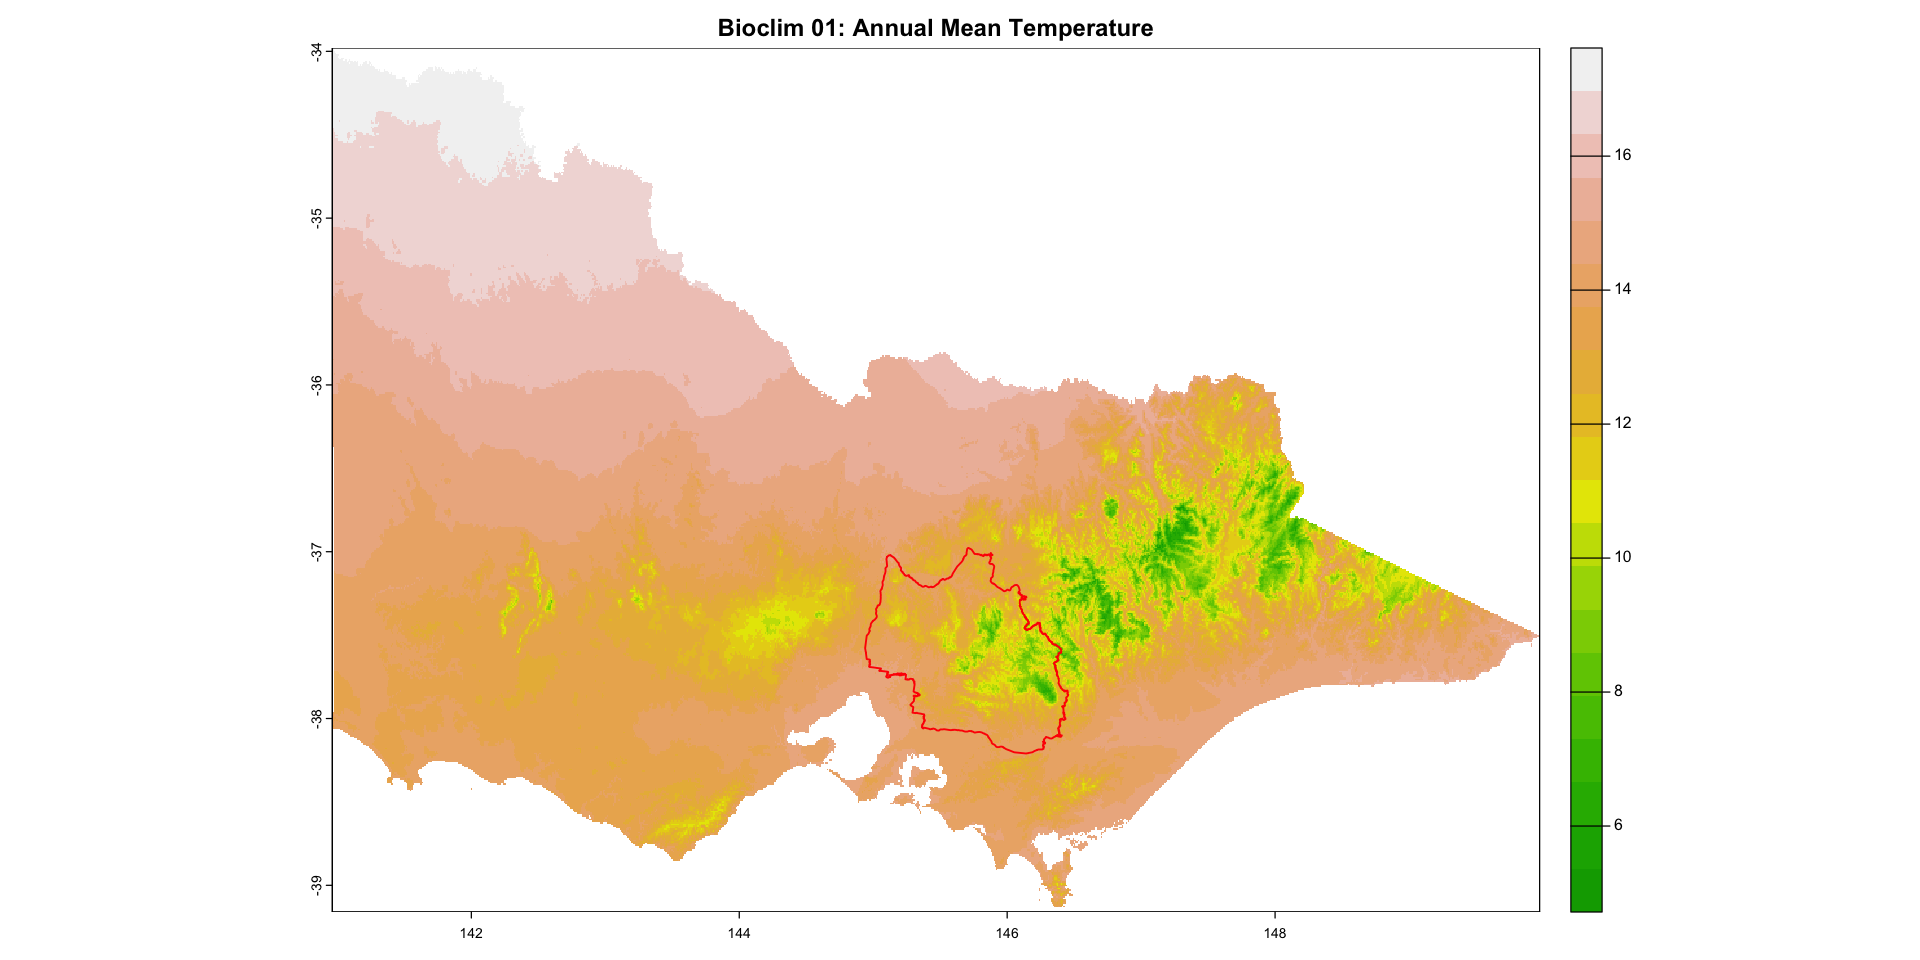

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


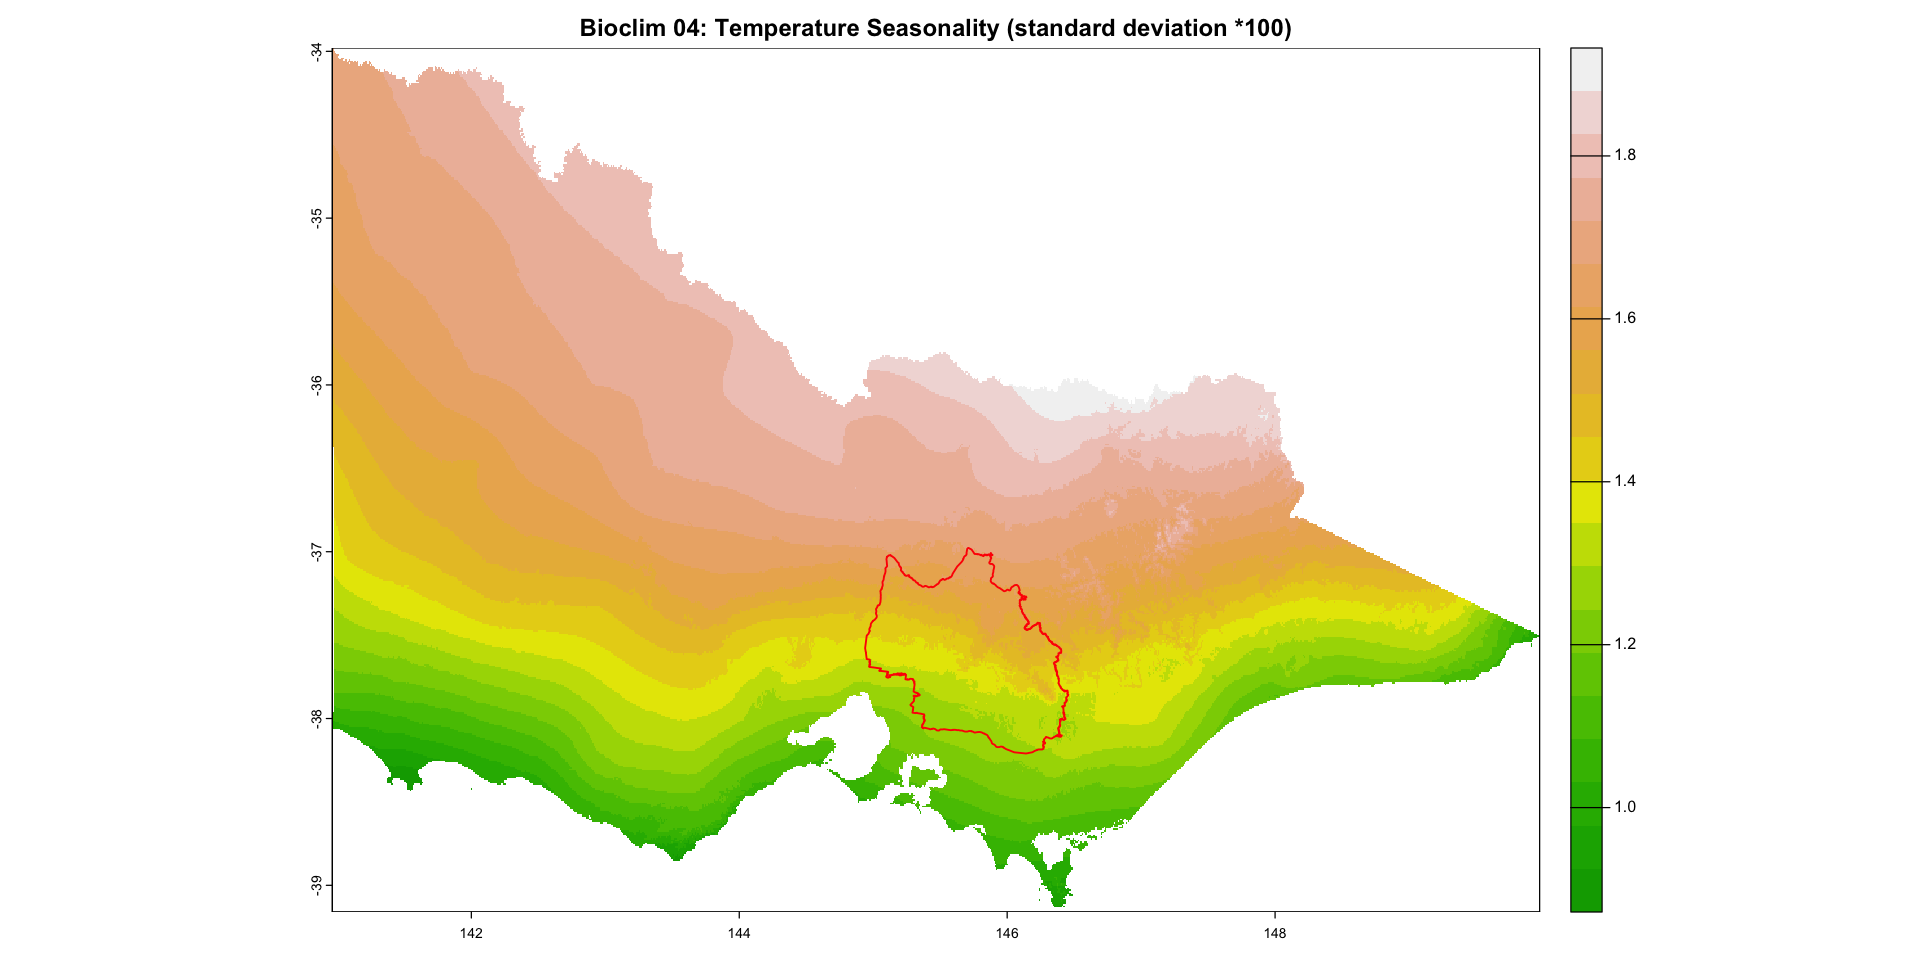

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


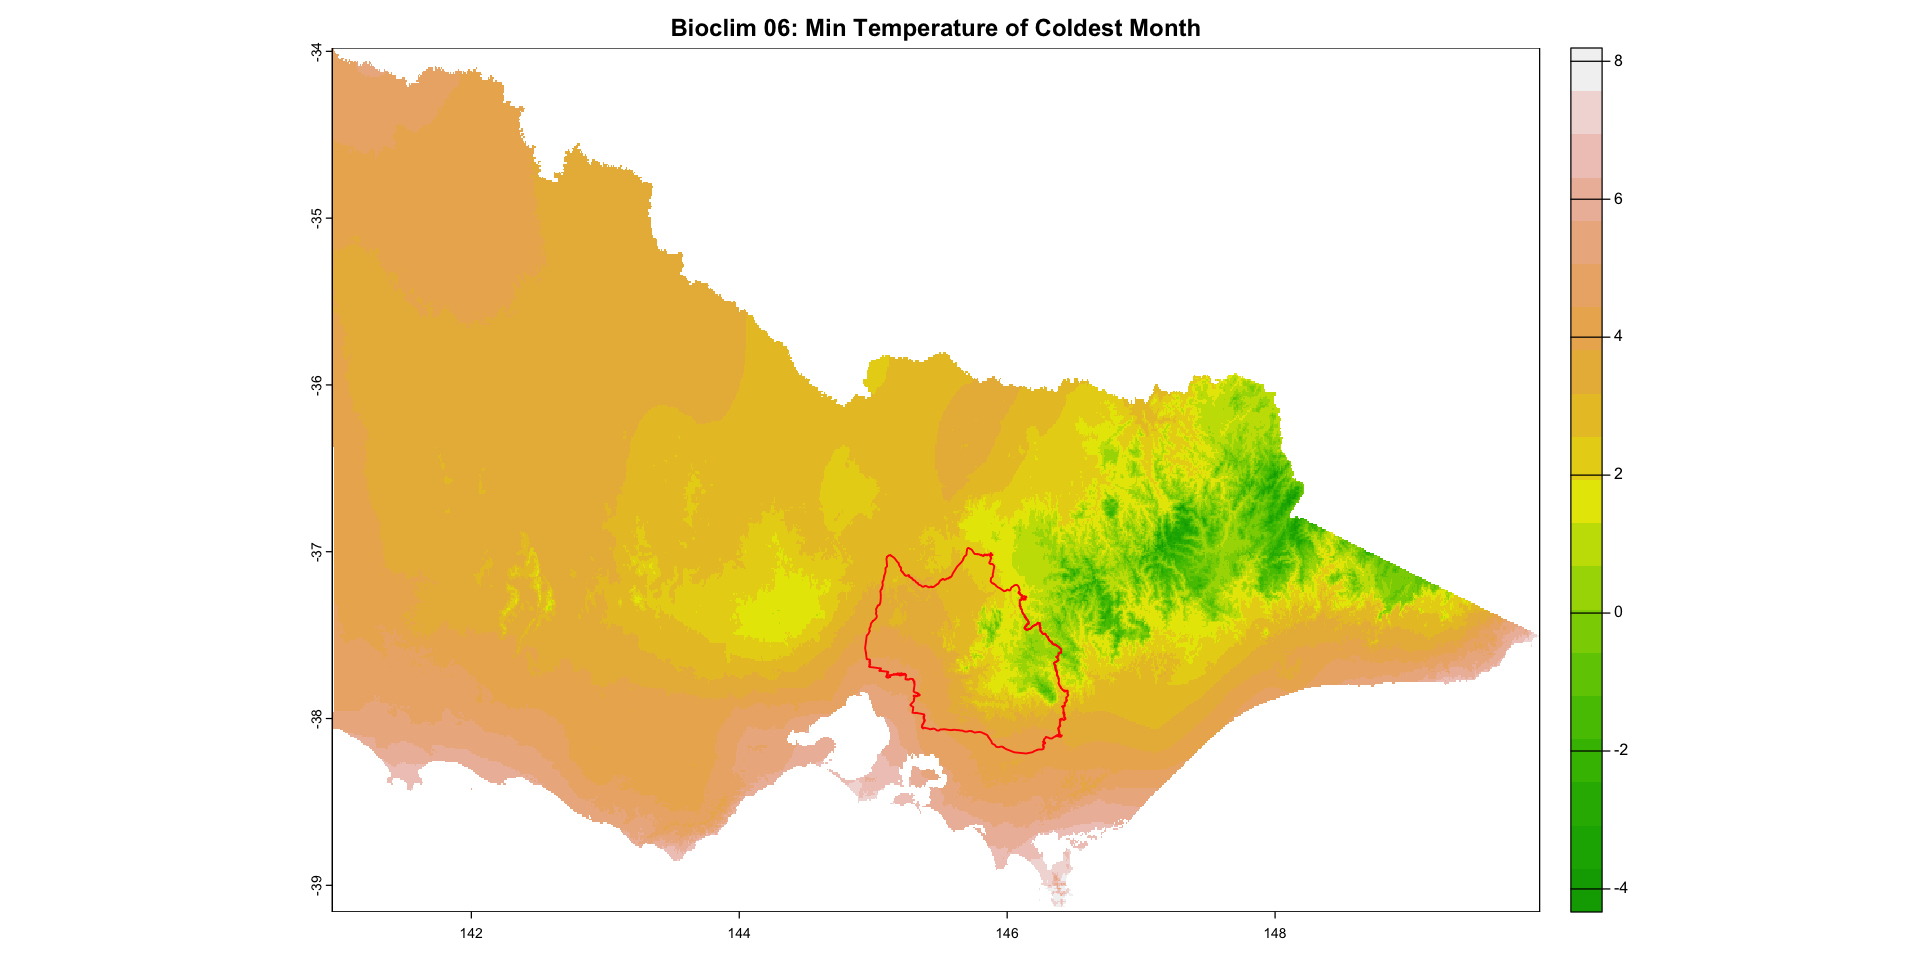

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


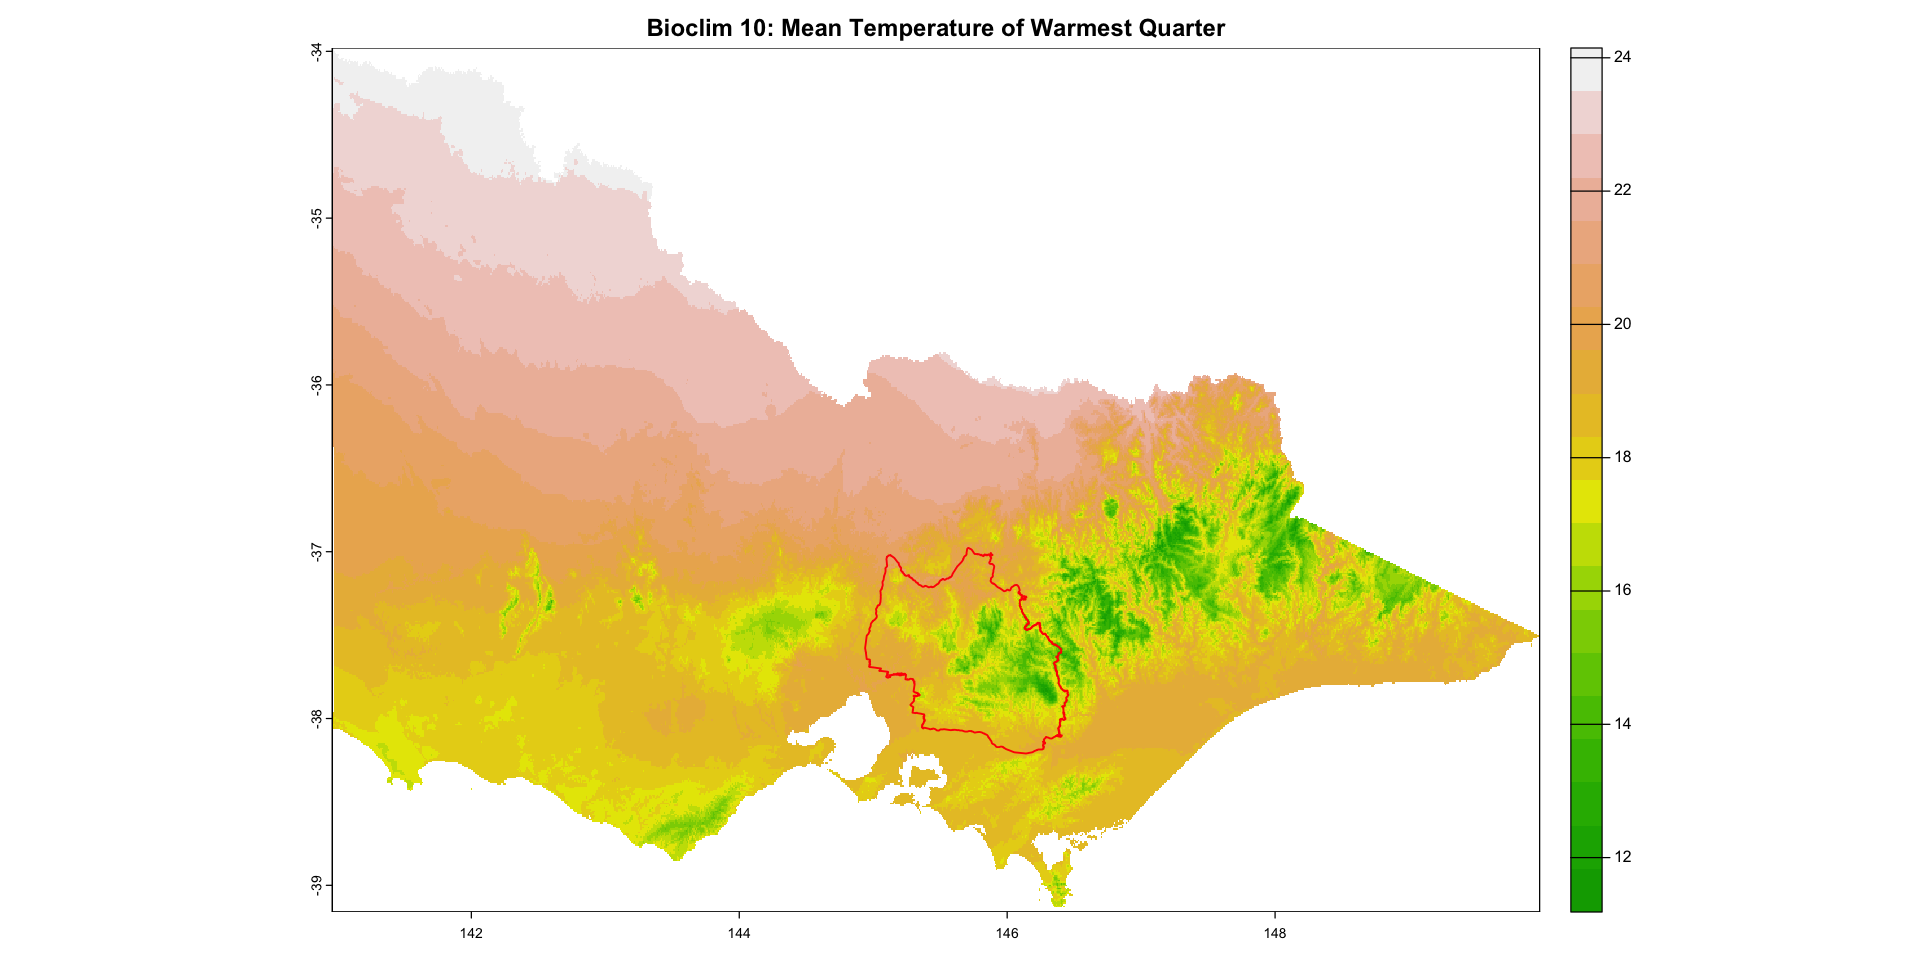

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


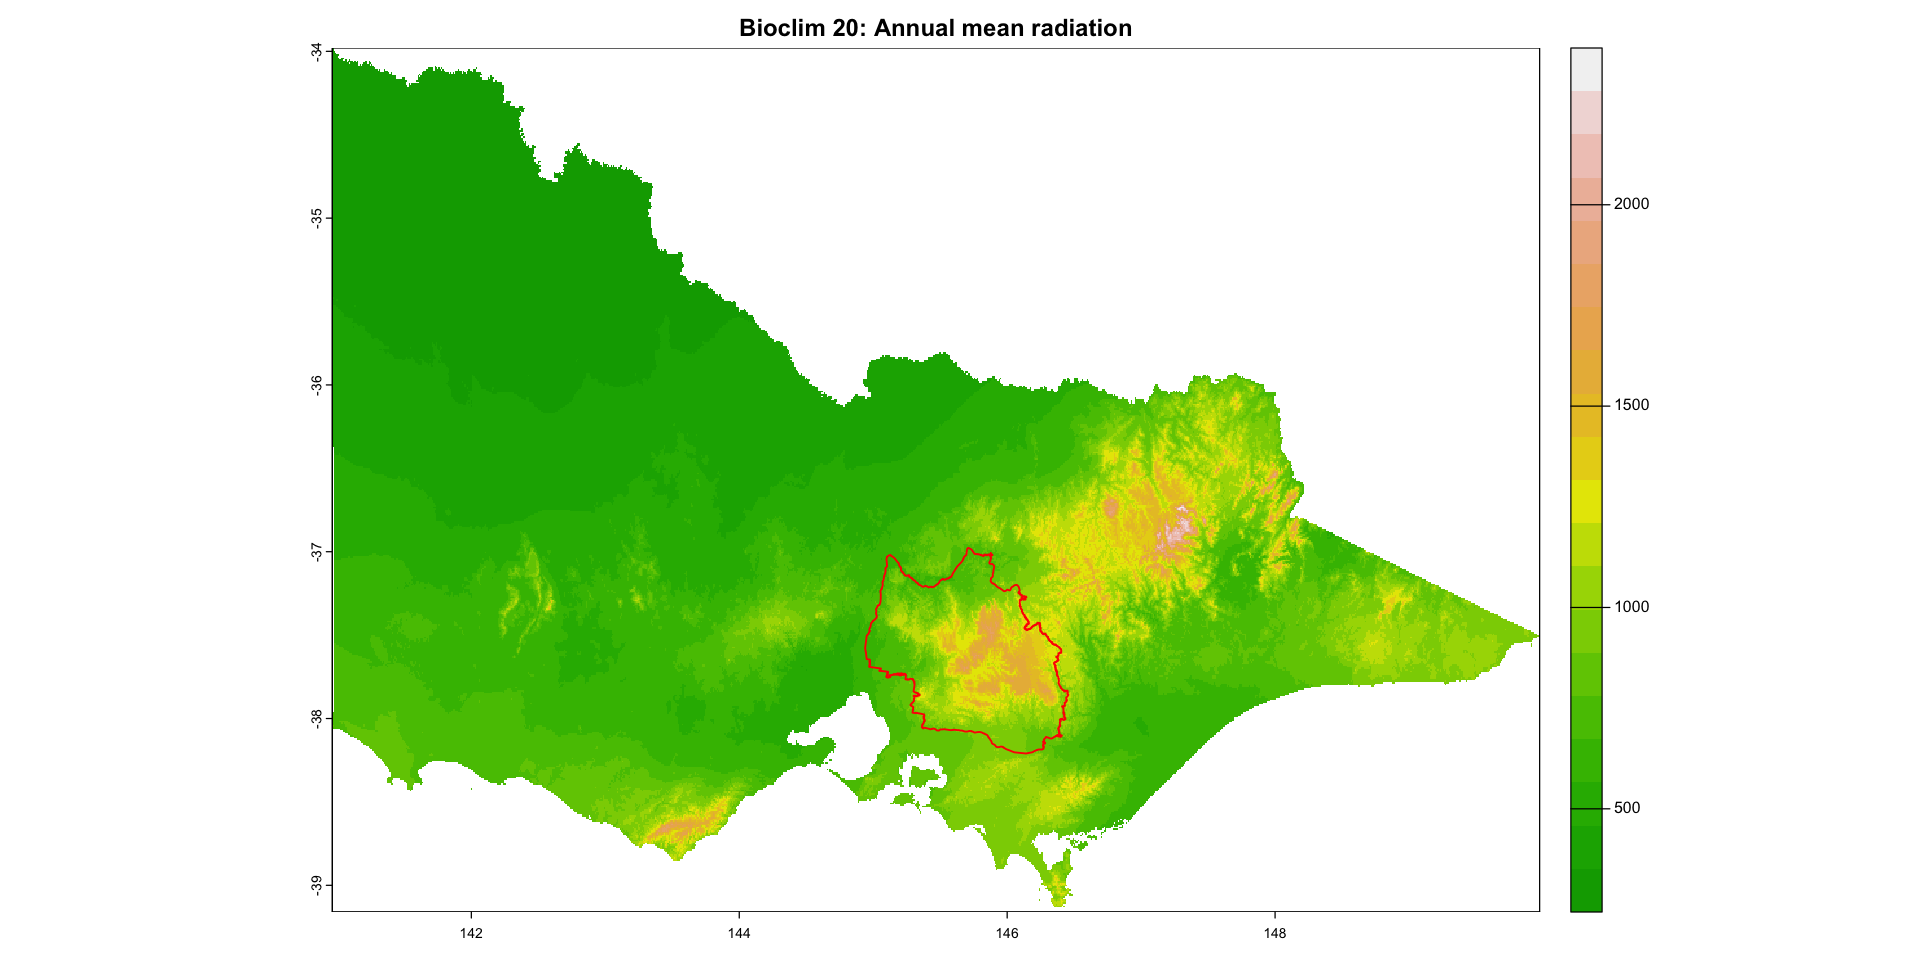

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


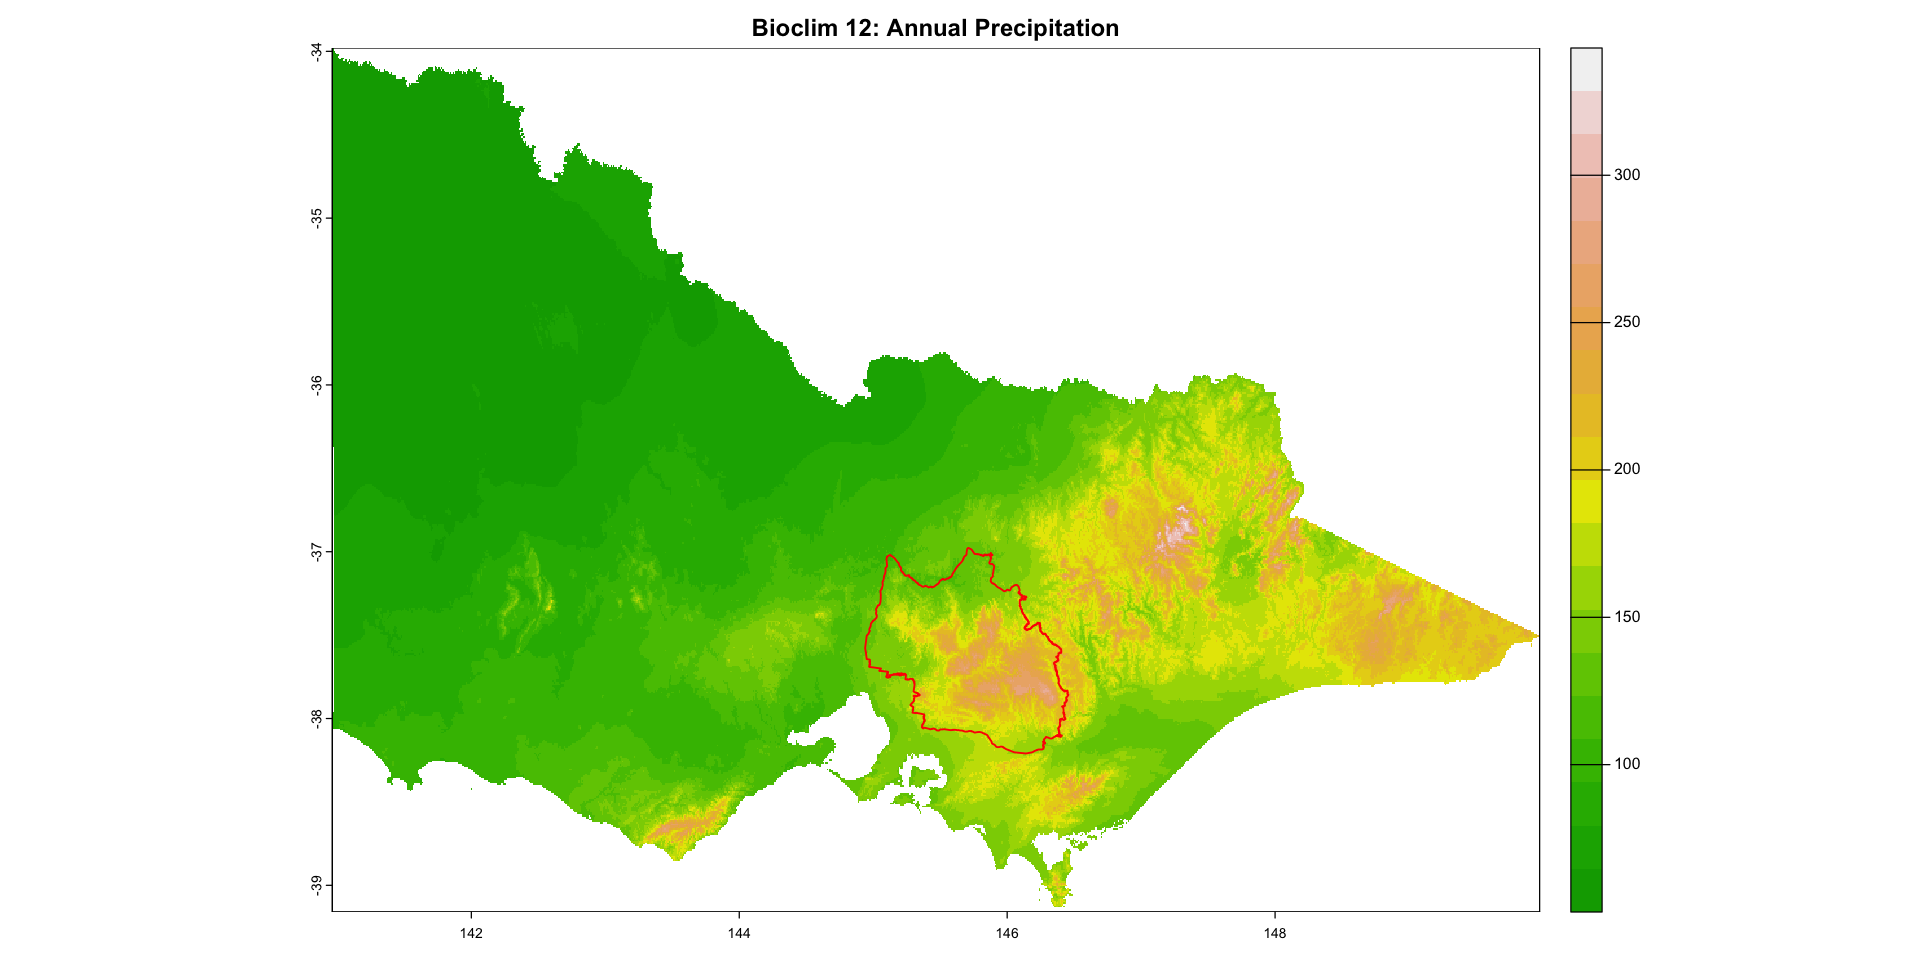

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


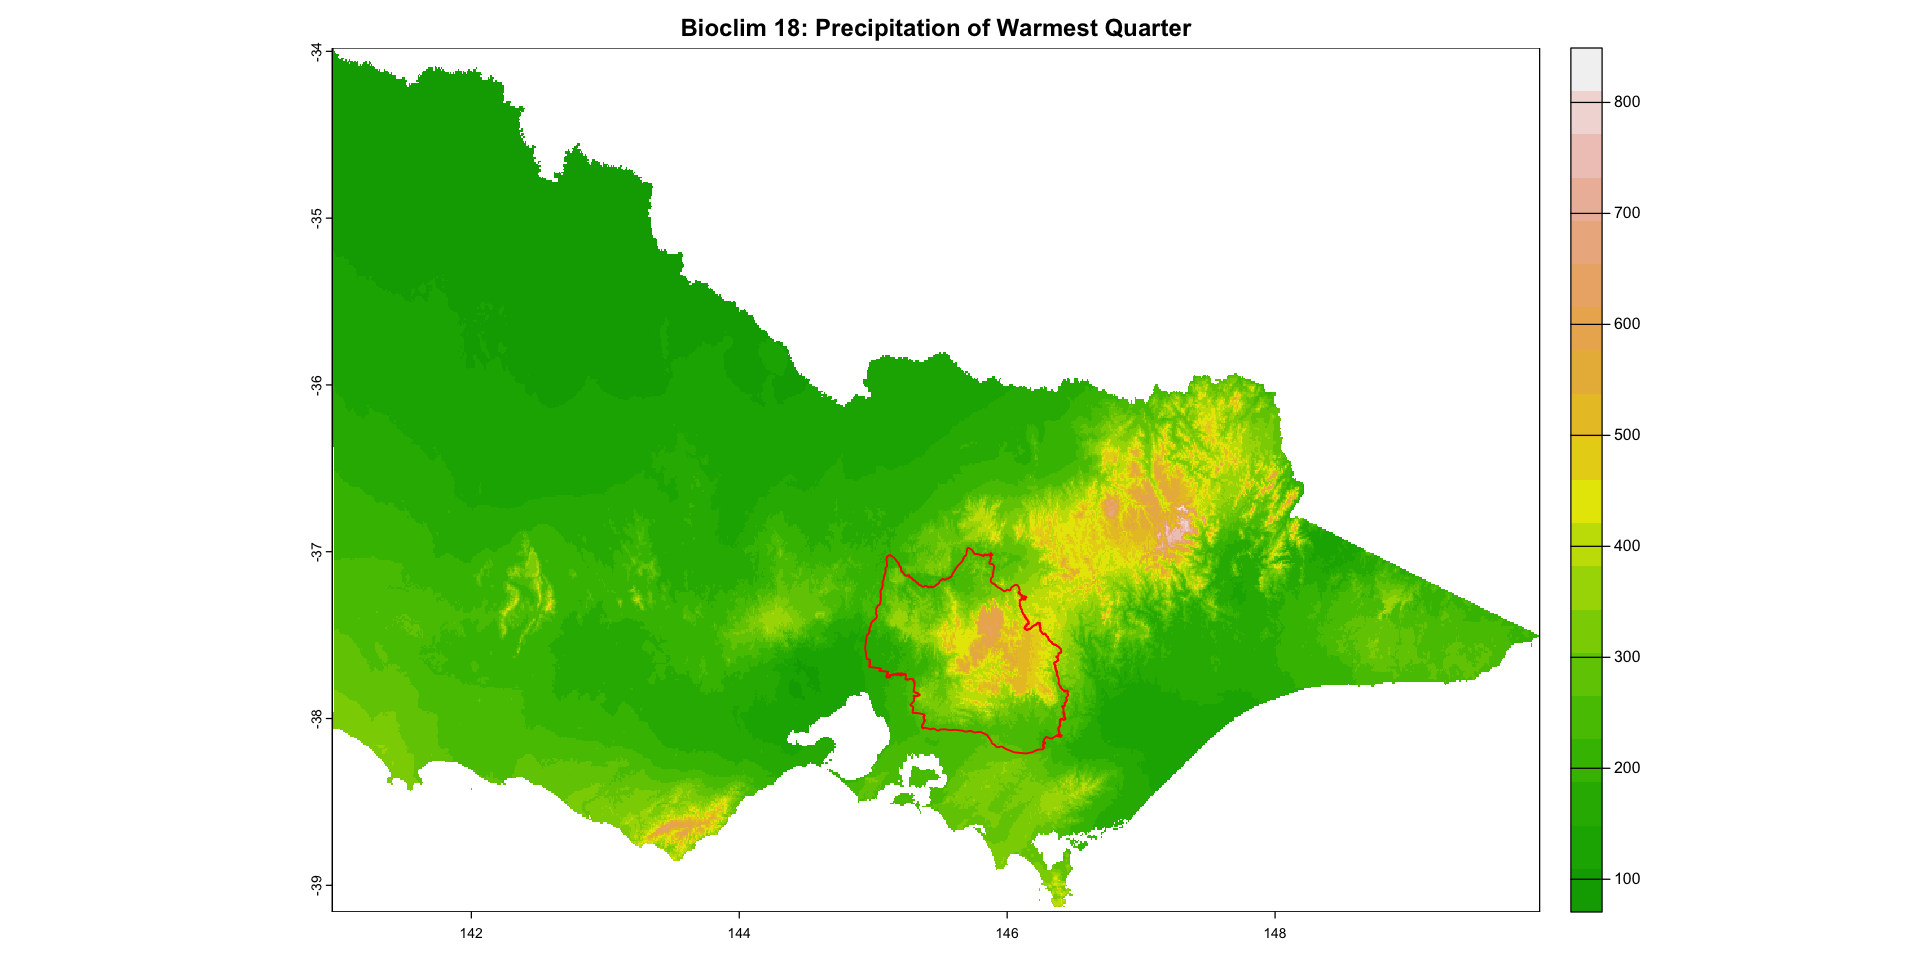

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


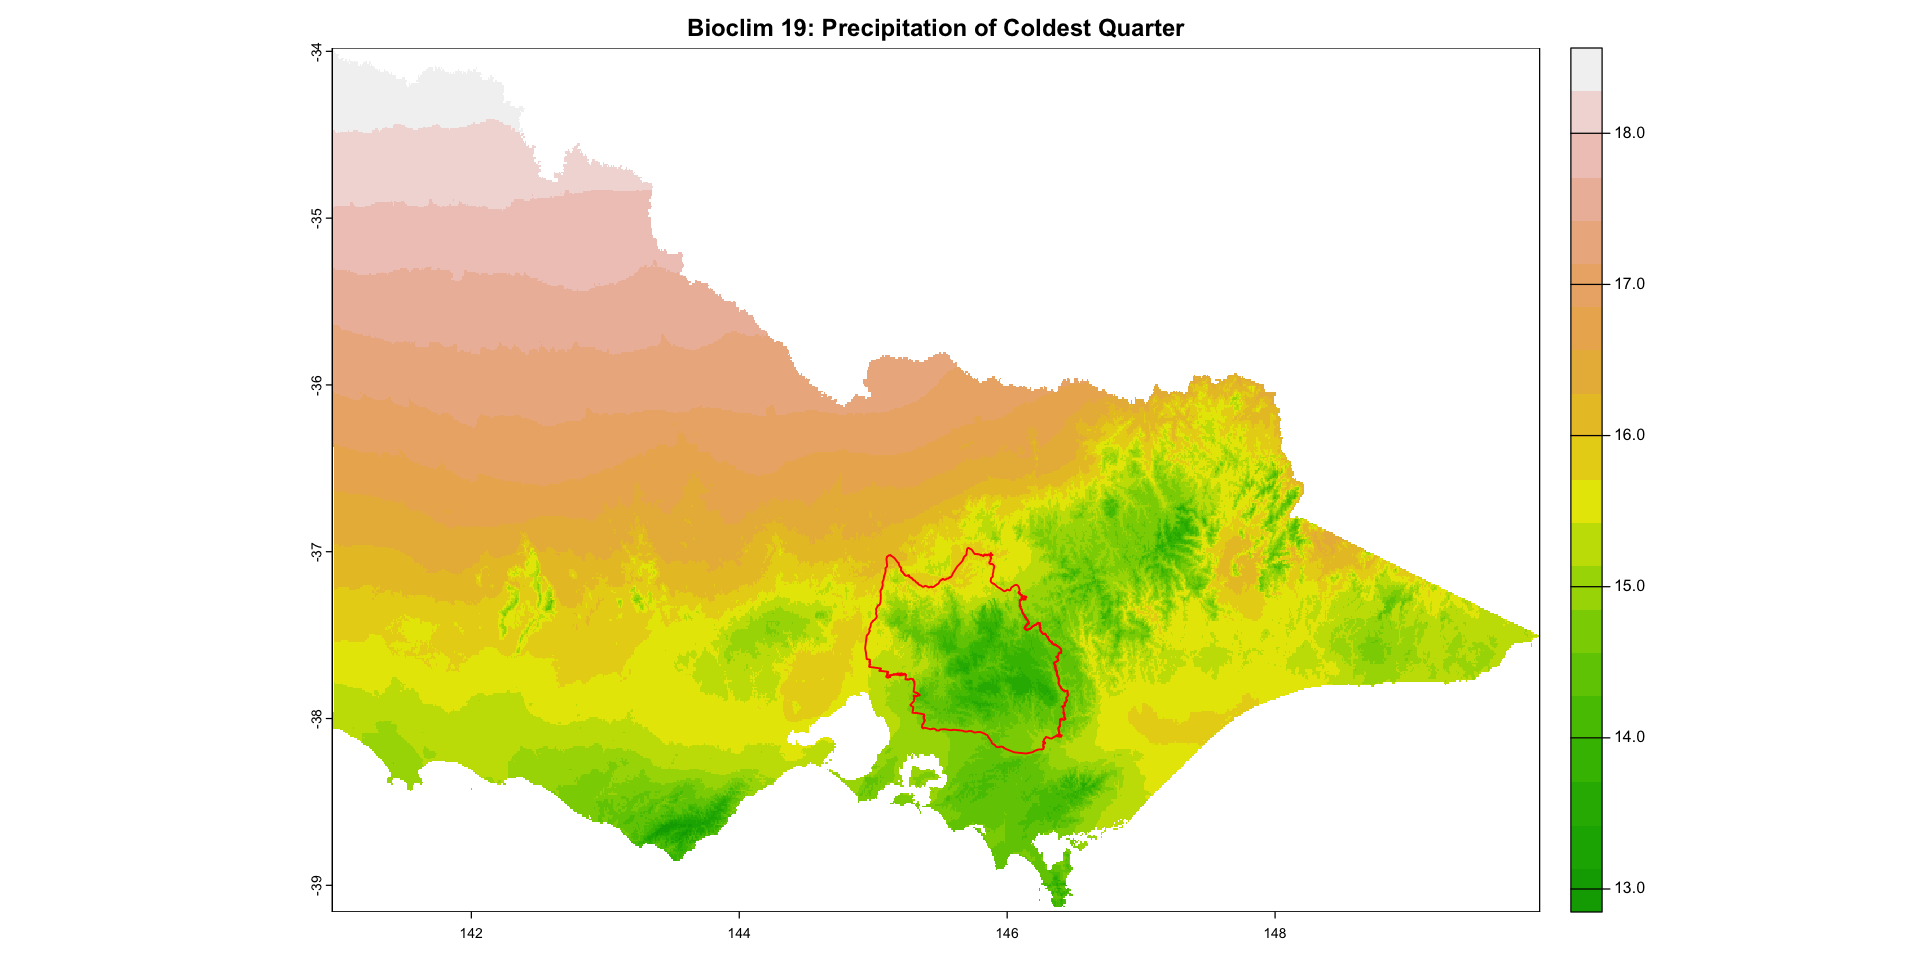

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


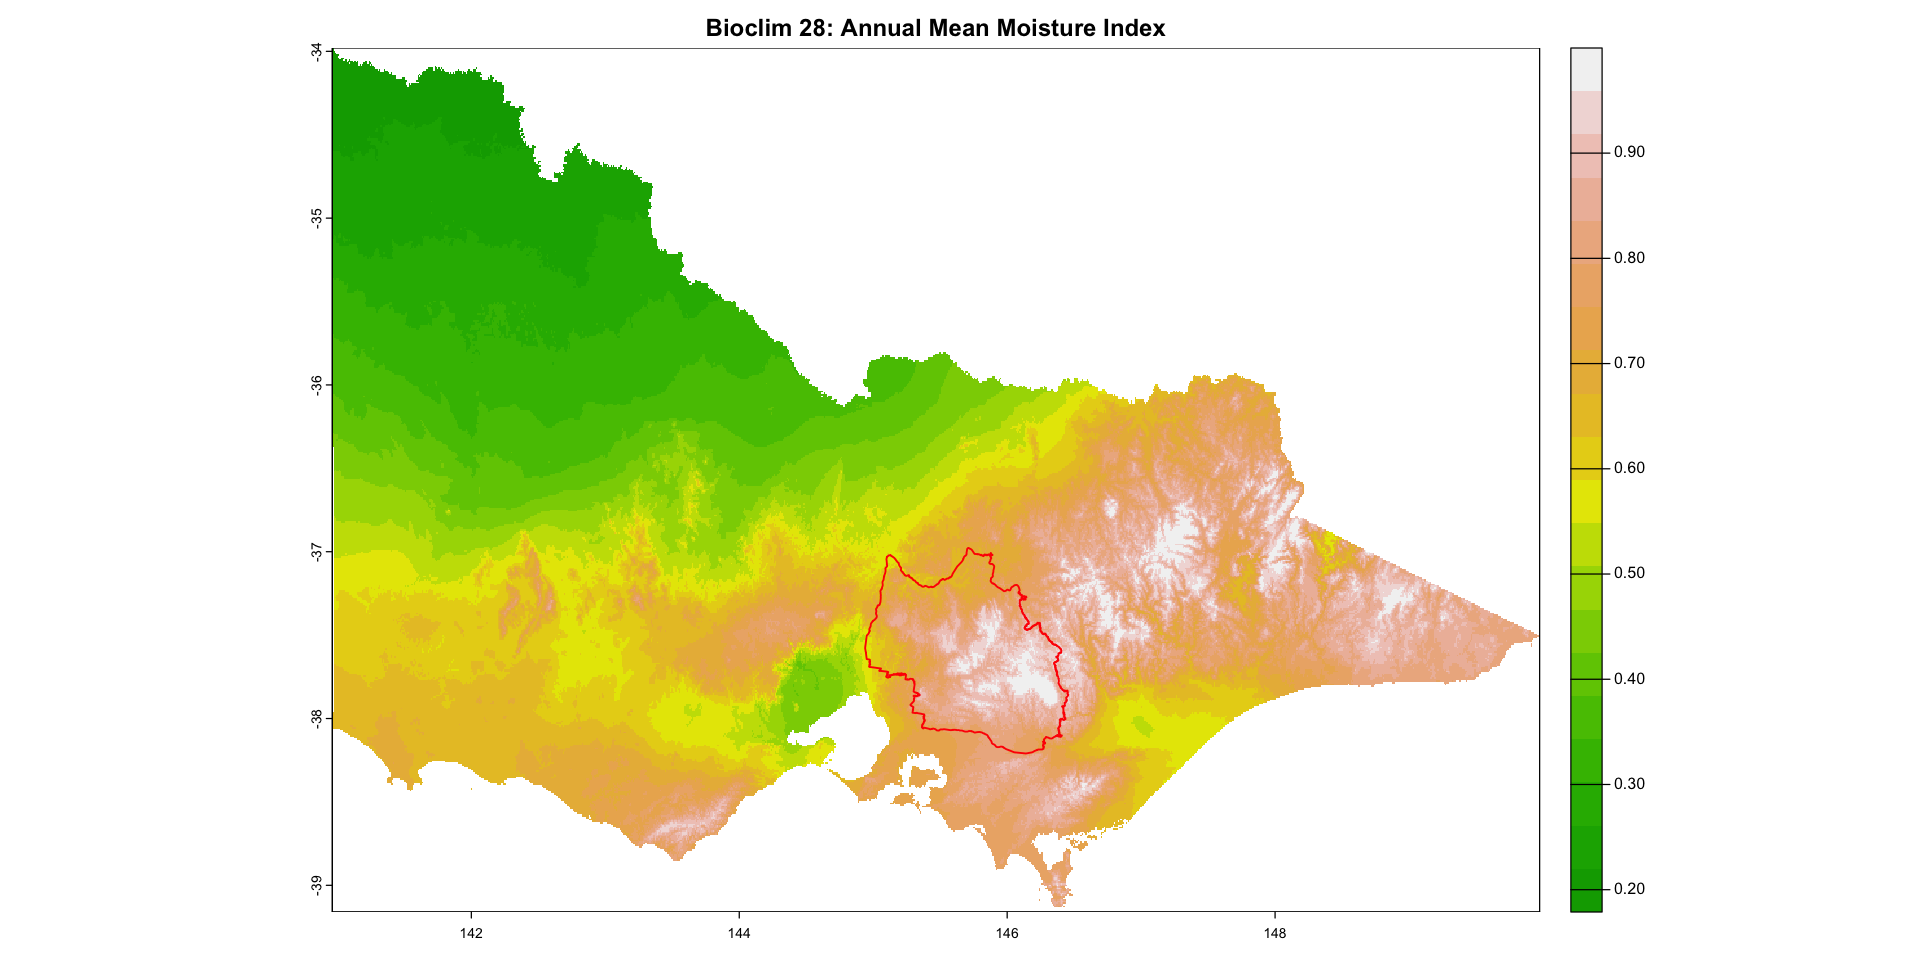

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


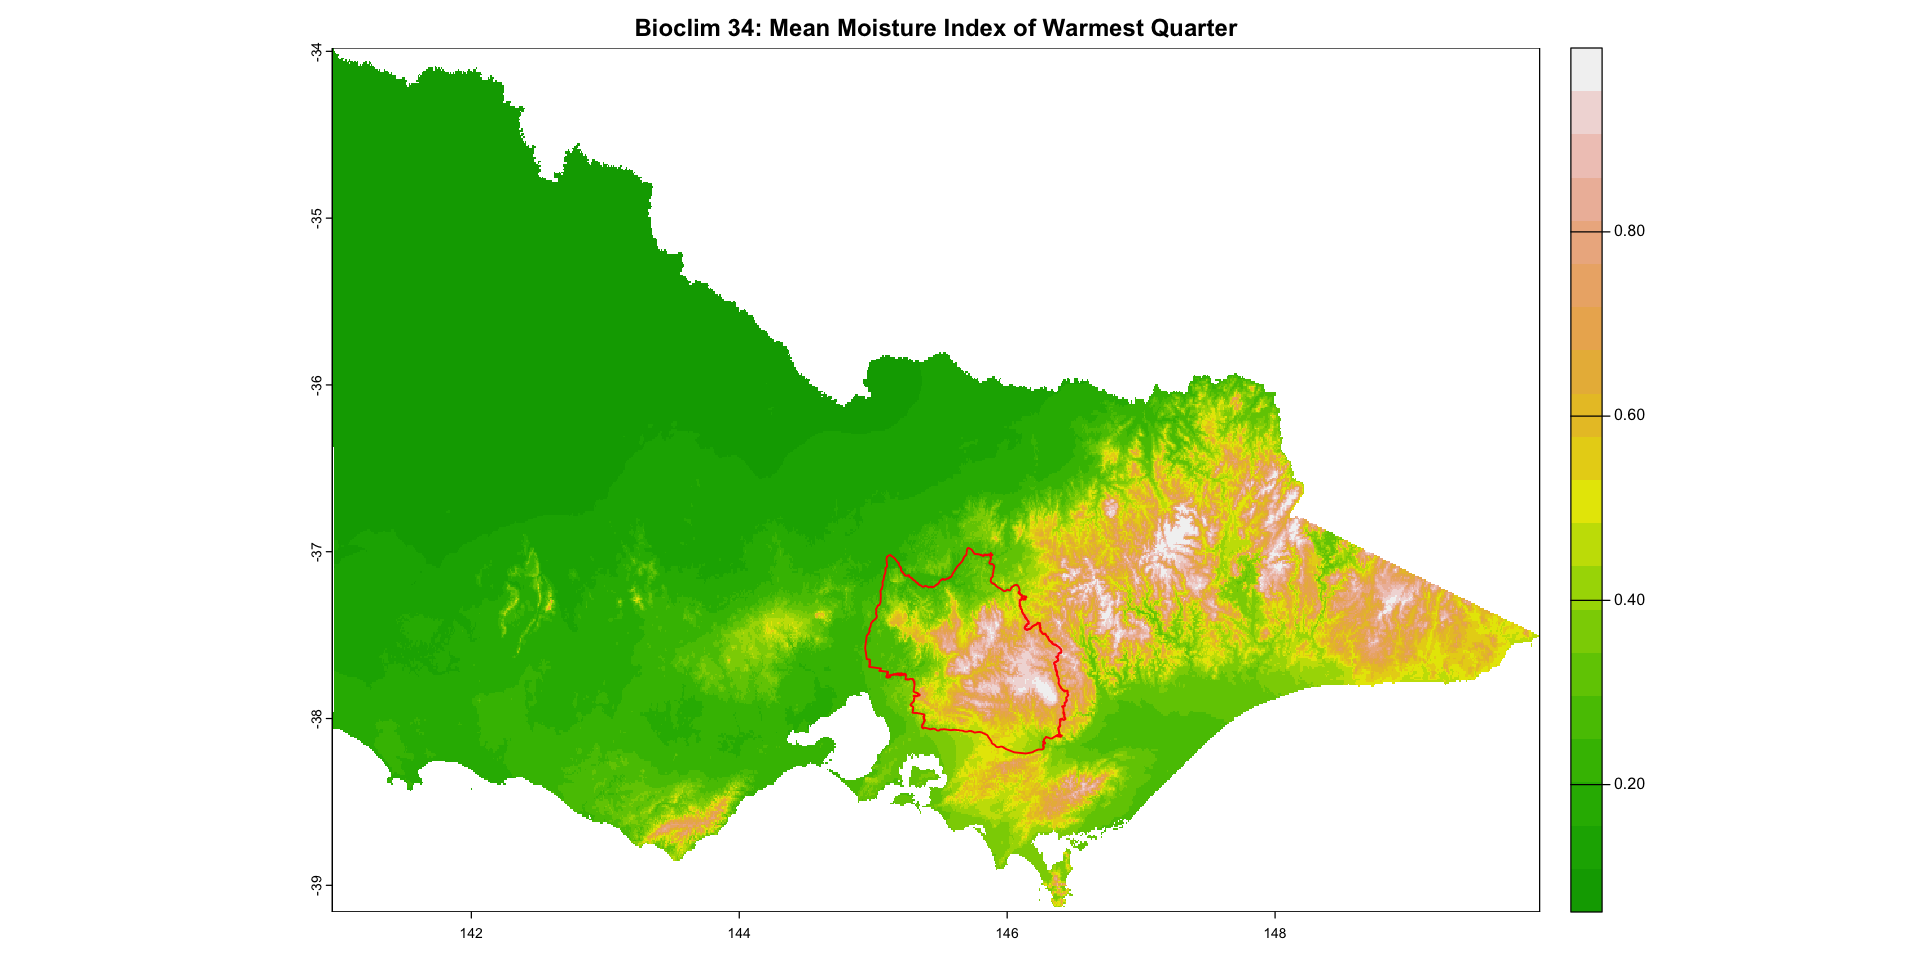

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


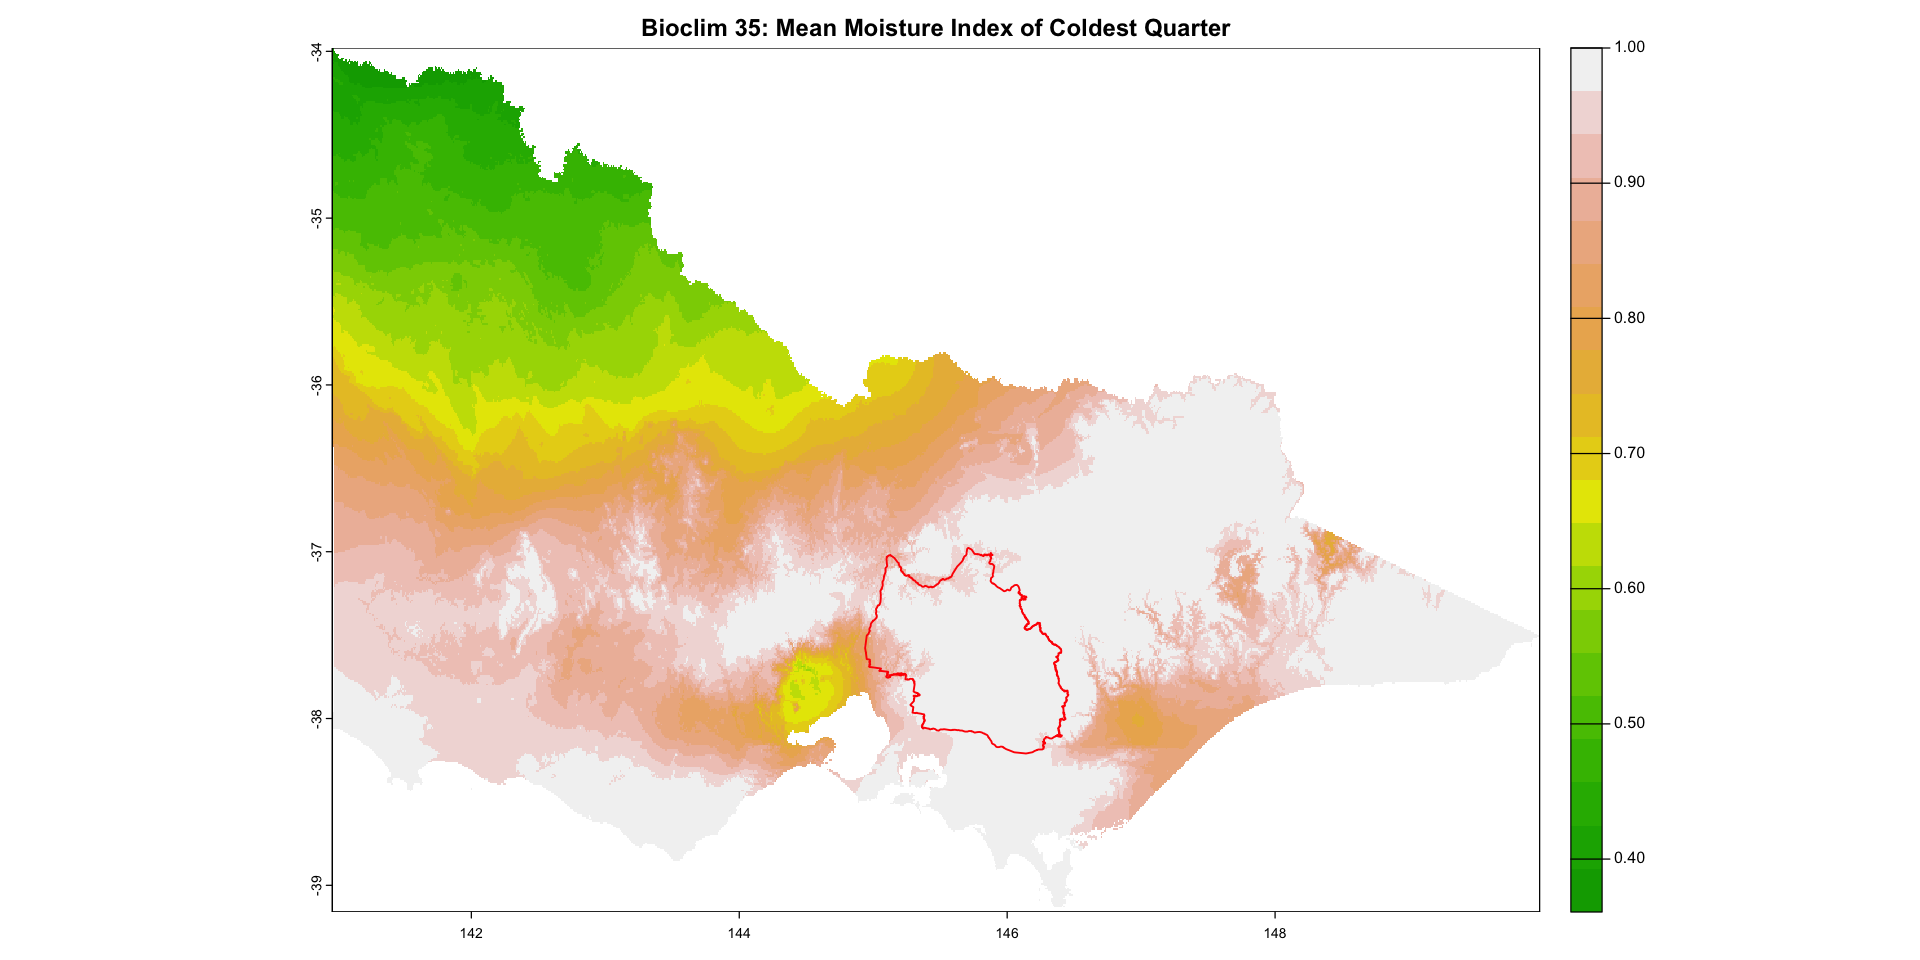

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


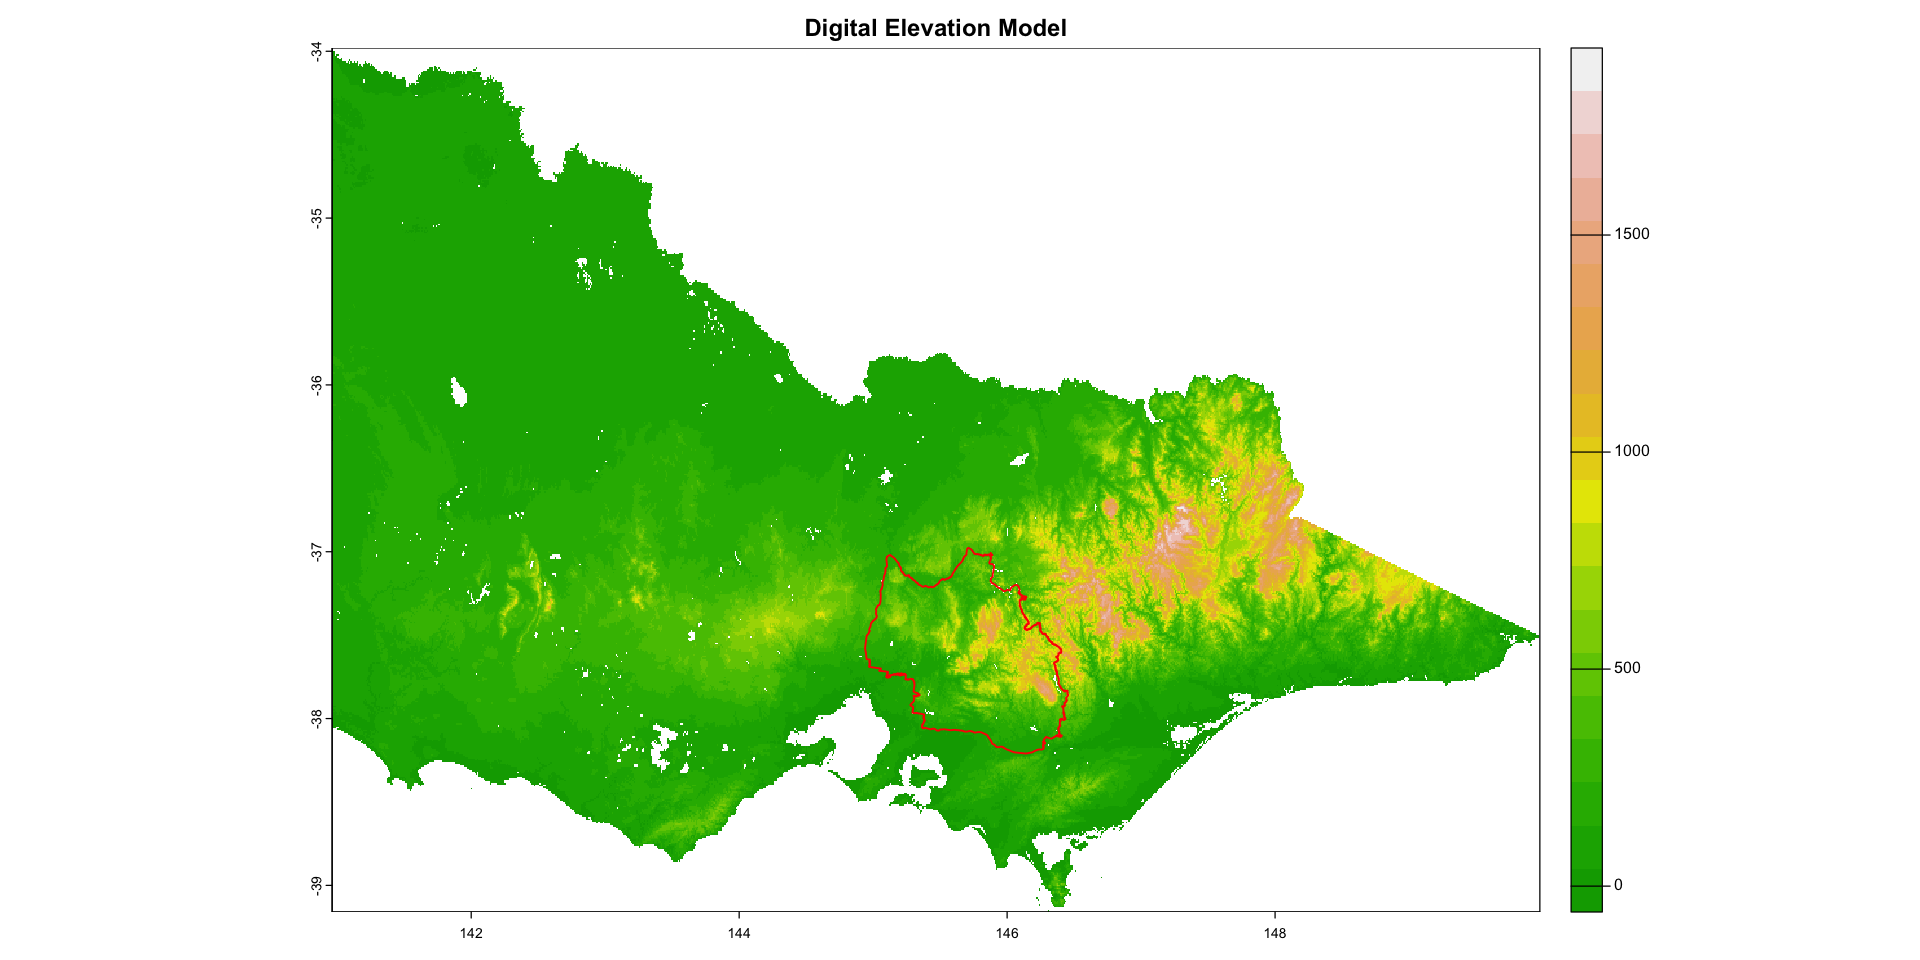

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


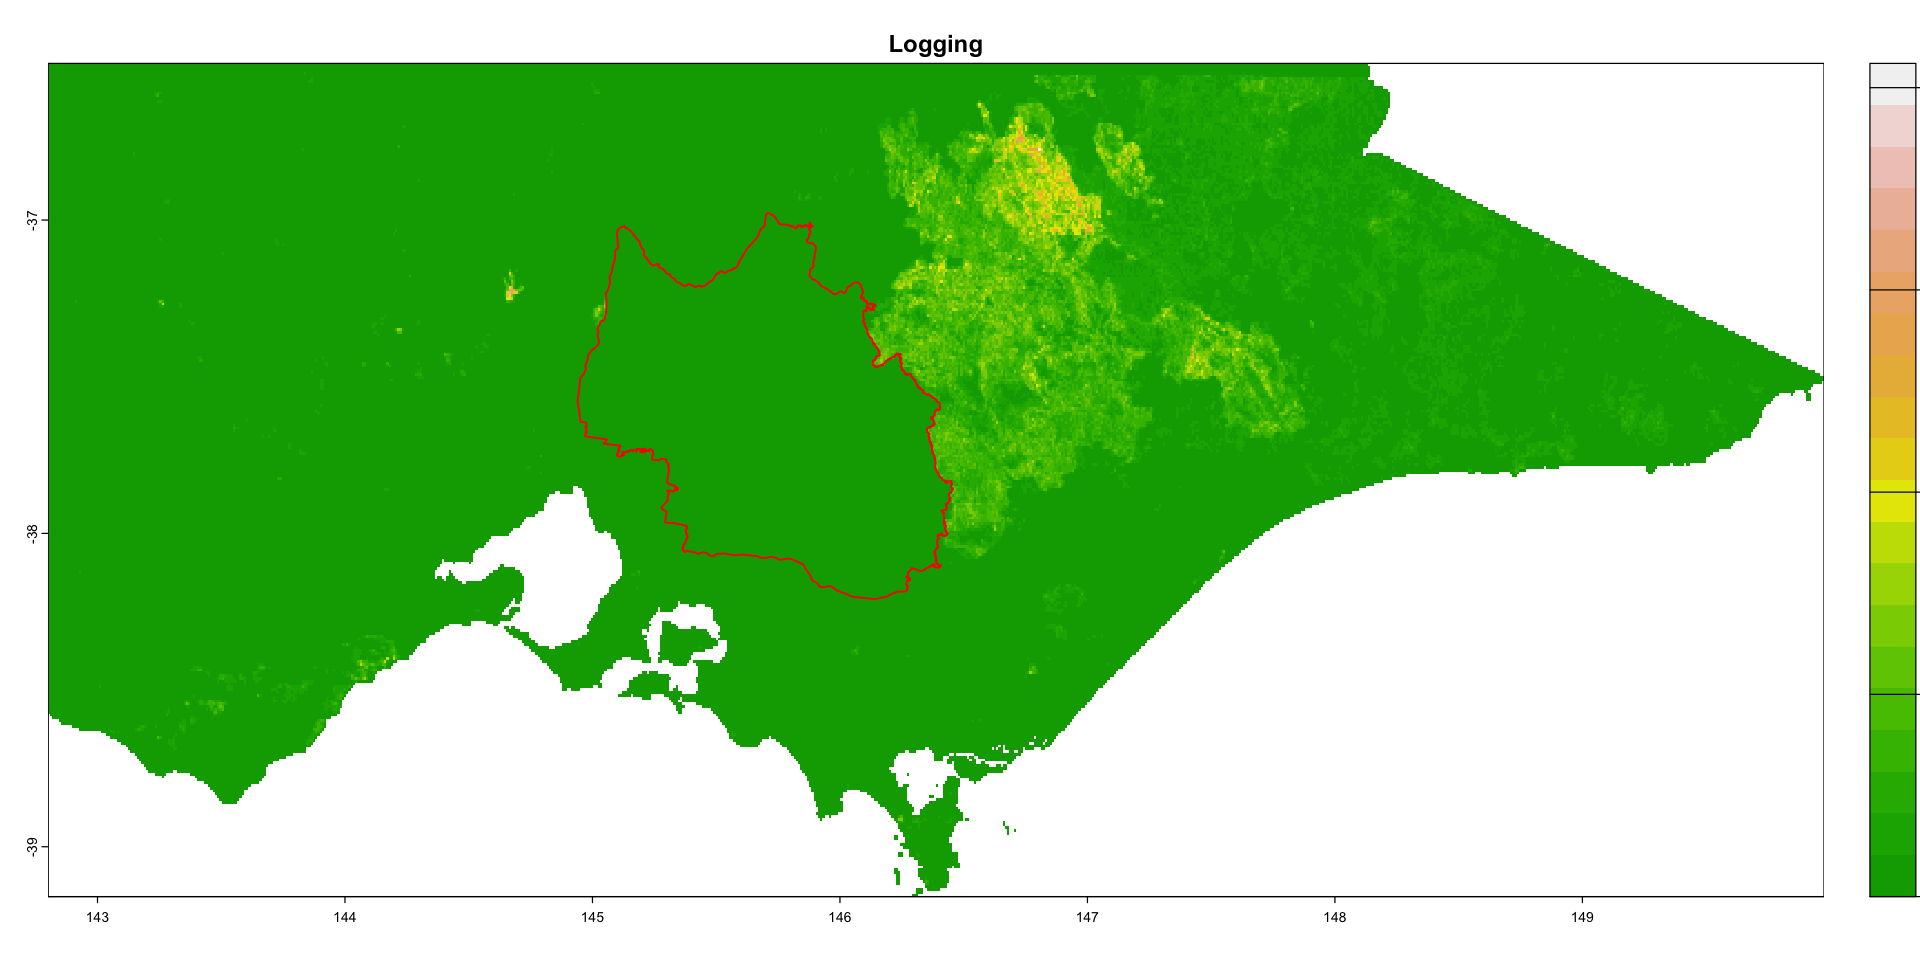

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


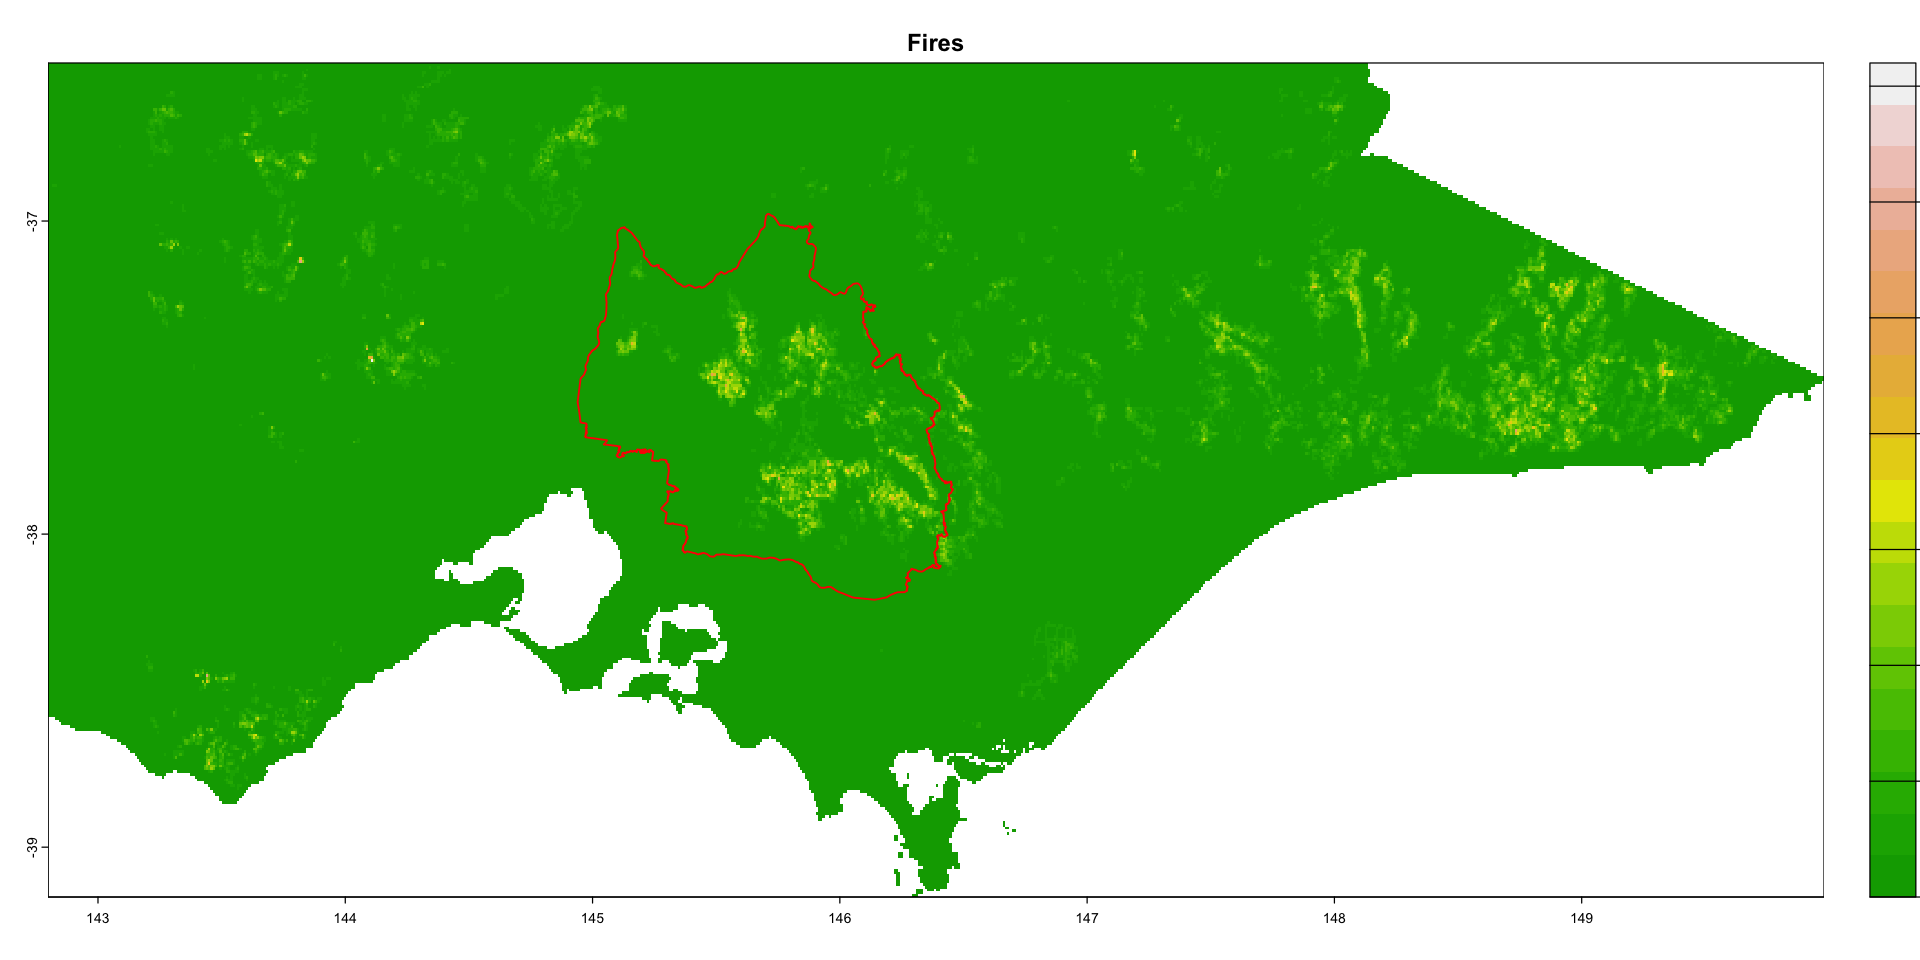

Warning message in plot.sf(central_highlands, add = TRUE, border = "red", weight = 1, :
“ignoring all but the first attribute”


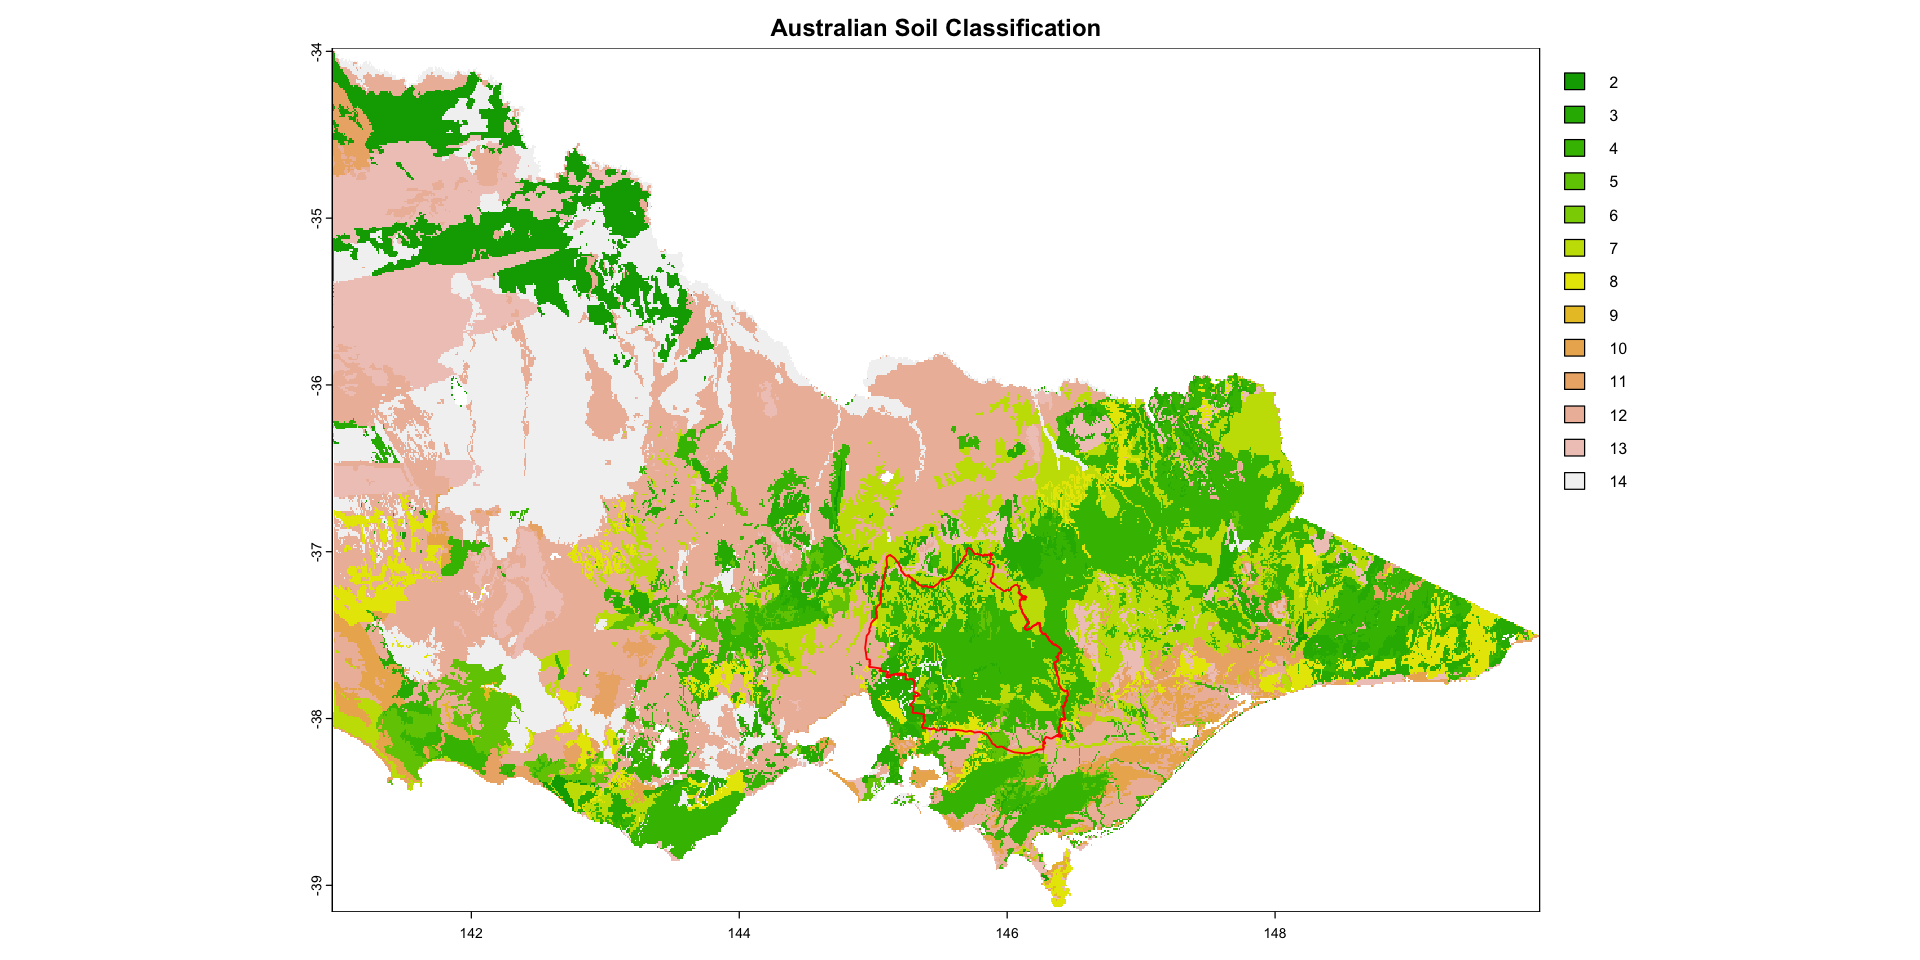

In [11]:
## {r plot_rasters, warning=FALSE}

layer_titles <- c(
   "Bioclim 01: Annual Mean Temperature",
   "Bioclim 04: Temperature Seasonality (standard deviation *100)",
   "Bioclim 06: Min Temperature of Coldest Month",
   "Bioclim 10: Mean Temperature of Warmest Quarter",
   "Bioclim 20: Annual mean radiation",
   "Bioclim 12: Annual Precipitation",
   "Bioclim 18: Precipitation of Warmest Quarter",
   "Bioclim 19: Precipitation of Coldest Quarter",
   "Bioclim 28: Annual Mean Moisture Index",
   "Bioclim 34: Mean Moisture Index of Warmest Quarter",
   "Bioclim 35: Mean Moisture Index of Coldest Quarter",
   "Digital Elevation Model",
   "Logging",
   "Fires",
   "Australian Soil Classification"
 )

for (i in seq_along(rasters)) {
  plot(rasters[[i]], main = layer_titles[i], col = terrain.colors(20))  # Plot raster
  plot(central_highlands, add = TRUE, border = "red", weight = 1,
  col = NA, lwd = 1.5)         # Overlay shapefile
}


It is great that all raster layers are sufficiently larger (but not too large) than our study area. This means we won't have any data gaps or overly large raster layers to manage.

## 1.4 Check CRS, Extent, and Resolution of Each Raster

In [12]:
## {r show_properties}

# Iterate over the rasters to show resolution, extent, and CRS
for (i in seq_along(rasters)) {
  cat("\nRaster", i, ":\n")
  
  # Show the resolution
  res_val <- res(rasters[[i]])
  cat("Resolution (x, y):", res_val[1], ",", res_val[2], "\n")
  
  # Show the extent - Modified to handle S4 object
  ext_val <- ext(rasters[[i]])
  cat("Extent:", as.character(ext_val), "\n") # Convert ext_val to character
  
  # Show the CRS
  crs_val <- crs(rasters[[i]])
  
  # Extract all occurrences of ID["EPSG",...] using gregexpr
  id_matches <- regmatches(crs_val, gregexpr("ID\\[\"EPSG\",[0-9]+\\]", crs_val))
  
  # Select the last match
  last_id <- tail(unlist(id_matches), 1)
  
  # Print the result
  cat("CRS:", last_id, "\n")
}


Raster 1 :
Resolution (x, y): 0.0025 , 0.0025 
Extent: ext(140.9625, 149.975, -39.16, -33.98) 
CRS: ID["EPSG",4283] 

Raster 2 :
Resolution (x, y): 0.0025 , 0.0025 
Extent: ext(140.9625, 149.975, -39.16, -33.98) 
CRS: ID["EPSG",4283] 

Raster 3 :
Resolution (x, y): 0.0025 , 0.0025 
Extent: ext(140.9625, 149.975, -39.16, -33.98) 
CRS: ID["EPSG",4283] 

Raster 4 :
Resolution (x, y): 0.0025 , 0.0025 
Extent: ext(140.9625, 149.975, -39.16, -33.98) 
CRS: ID["EPSG",4283] 

Raster 5 :
Resolution (x, y): 0.0025 , 0.0025 
Extent: ext(140.9625, 149.975, -39.16, -33.98) 
CRS: ID["EPSG",4283] 

Raster 6 :
Resolution (x, y): 0.0025 , 0.0025 
Extent: ext(140.9625, 149.975, -39.16, -33.98) 
CRS: ID["EPSG",4283] 

Raster 7 :
Resolution (x, y): 0.0025 , 0.0025 
Extent: ext(140.9625, 149.975, -39.16, -33.98) 
CRS: ID["EPSG",4283] 

Raster 8 :
Resolution (x, y): 0.0025 , 0.0025 
Extent: ext(140.9625, 149.975, -39.16, -33.98) 
CRS: ID["EPSG",4283] 

Raster 9 :
Resolution (x, y): 0.0025 , 0.0025 
Extent: 


**CRS**: All the raster layers have the same CRS, which is EPSG: 4283.

**Extent**: Raster 1-11 and 15 have the same extent, the rest raster layers have different extents. All the extents of these raster files are sufficiently larger then the extent of the study area. So we don't have to worry too much on this.

**Resolution**: Raster 1-11 and 15 have the same resolution, which is 0.0025 degree (9 seconds), the rest raster layers have different resolutions.

We need to unify extent and resolutions.

## 1.5 Unify CRS and Resolution

As we know, the CRS of the shapefile of the study area and all the raster files is EPSG:4283 (unit in degree). What if I want to change the CRS of these files to **EPSG: 28355** (GDA94 / MAG Zone 55, unit in meter), a more precise CRS for our study area (why? read this [article](https://parametricmonkey.com/2020/04/08/understanding-australias-coordinate-systems/) by Paul Wintour).

In [13]:
## {r reproject_rasters}

# Function to check CRS and reproject to EPSG: 28355
reproject_if_needed <- function(raster, is_categorical = FALSE) {
  EPSG_28255 <- "EPSG:28355"  # Define EPSG: 28355

  # Check if the CRS is already EPSG:28355
  if (!identical(crs(raster), EPSG_28255)) {
    # Choose the appropriate method based on raster type
    method <- if (is_categorical) "near" else "bilinear" # see note below this chunk
    message("Reprojecting raster to EPSG:28355 using method: ", method)

    # Reproject raster to EPSG:28355
    raster <- project(raster, EPSG_28255, method = method)

    # Convert to factor again if categorical to ensure category levels are preserved
    if (is_categorical) {
      raster <- as.factor(raster)
    }
  }

  return(raster)
}

Different interpolation methods are appropriate for different types of data:

-   **"near" (nearest neighbor interpolation)**: Used for **categorical data** (e.g., land cover types or classifications) because it preserves discrete class values.

-   **"bilinear" (bilinear interpolation)**: Used for **continuous data** (e.g., temperature, elevation) because it smooths values by averaging nearby points.

In [14]:
## {r check_again}

# It is not a bad idea to check again whether your raster files are in the right data type.

# Check if each raster is categorical or continuous
for (i in seq_along(rasters)) {
  if (is.factor(rasters[[i]])) {
    cat(names(rasters[[i]]), "is categorical.\n")
  } else {
    cat(names(rasters[[i]]), "is continuous.\n")
  }
}

# if not, factorize the categirical raster file manually
# rasters[[15]] <- as.factor(rasters[[15]])


AusClim_bioclim_01_9s_1976-2005 is continuous.
AusClim_bioclim_04_9s_1976-2005 is continuous.
AusClim_bioclim_06_9s_1976-2005 is continuous.
AusClim_bioclim_10_9s_1976-2005 is continuous.
AusClim_bioclim_12_9s_1976-2005 is continuous.
AusClim_bioclim_18_9s_1976-2005 is continuous.
AusClim_bioclim_19_9s_1976-2005 is continuous.
AusClim_bioclim_20_9s_1976-2005 is continuous.
AusClim_bioclim_28_9s_1976-2005 is continuous.
AusClim_bioclim_34_9s_1976-2005 is continuous.
AusClim_bioclim_35_9s_1976-2005 is continuous.
digital_elevation_model_3s_2009_3s is continuous.
Fire_events_projection_area is continuous.
Logging_1km is continuous.
nsg-2011-250m_asc is categorical.


In [15]:
## {r reproject_CRS}

# Define the categorical raster indices
categorical_indices <- c(15)  # Adjust if there are other categorical rasters

# Apply the function to each raster in the list
rasters_reprojected <- lapply(seq_along(rasters), function(i) {
  is_categorical <- i %in% categorical_indices
  reproject_if_needed(rasters[[i]], is_categorical = is_categorical)
})

Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: bilinear



Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: bilinear

Reprojecting raster to EPSG:28355 using method: near



Let's check the properties of all raster files.

In [16]:
## {r check_property_again}

# Iterate over the reprojected rasters to show resolution, extent, and CRS
for (i in seq_along(rasters_reprojected)) {
  cat("\nRaster", i, ":\n")
  
  # Show the resolution
  res_val <- res(rasters_reprojected[[i]])
  cat("Resolution (x, y):", res_val[1], ",", res_val[2], "\n")
  
  # Show the extent - Modified to handle S4 object
  ext_val <- ext(rasters_reprojected[[i]])
  cat("Extent:", as.character(ext_val), "\n") # Convert ext_val to character
  
  # Show the CRS
  crs_val <- crs(rasters_reprojected[[i]])
  
  # Extract all occurrences of ID["EPSG",...] using gregexpr
  id_matches <- regmatches(crs_val, gregexpr("ID\\[\"EPSG\",[0-9]+\\]", crs_val))
  
  # Select the last match
  last_id <- tail(unlist(id_matches), 1)
  
  # Print the result
  cat("CRS:", last_id, "\n")
}


Raster 1 :
Resolution (x, y): 238.1606 , 238.1606 
Extent: ext(-58070.4168458765, 774777.333003385, 5647993.85079617, 6240061.19598497) 
CRS: ID["EPSG",28355] 

Raster 2 :
Resolution (x, y): 238.1606 , 238.1606 
Extent: ext(-58070.4168458765, 774777.333003385, 5647993.85079617, 6240061.19598497) 
CRS: ID["EPSG",28355] 

Raster 3 :
Resolution (x, y): 238.1606 , 238.1606 
Extent: ext(-58070.4168458765, 774777.333003385, 5647993.85079617, 6240061.19598497) 
CRS: ID["EPSG",28355] 

Raster 4 :
Resolution (x, y): 238.1606 , 238.1606 
Extent: ext(-58070.4168458765, 774777.333003385, 5647993.85079617, 6240061.19598497) 
CRS: ID["EPSG",28355] 

Raster 5 :
Resolution (x, y): 238.1606 , 238.1606 
Extent: ext(-58070.4168458765, 774777.333003385, 5647993.85079617, 6240061.19598497) 
CRS: ID["EPSG",28355] 

Raster 6 :
Resolution (x, y): 238.1606 , 238.1606 
Extent: ext(-58070.4168458765, 774777.333003385, 5647993.85079617, 6240061.19598497) 
CRS: ID["EPSG",28355] 

Raster 7 :
Resolution (x, y): 238

As we can see, we unified the CRS of all raster files to EPSG:28355. We can also notice that the figures in resolution and extent have changed. That is because the unit of the CRS has changed from degree to meter.

## 1.6 Resample Rasters to Match the Finest Resolution

There are two methods for unifying the resolutions of raster files: (1) resampling to the finest resolution or (2) resampling to the coarsest resolution. Resampling to the finest resolution preserves as much information as possible from the original raster files but increases the file size and processing time. On the other hand, resampling to the coarsest resolution significantly reduces the file size and processing time, though it may result in some loss of detail.

In EcoCommons, we recommend using the finest resolution when the objective of the study is well known, and coarser resolutions for preliminary / pilot study. The decision of fine vs coarse also depends on your study area, species and data availability. For example, when studying large, mobile animals such as whales or elephants, resampling all your raster files—from, say, 1 km, 5 km, 250 m, and 5 m to 5 m—would result in an unnecessary computational burden and waste of resources.

In [17]:
## {r resample_rasters}

# Determine the finest resolution among the reprojected rasters
resolutions <- sapply(rasters_reprojected, function(r) res(r)[1] * res(r)[2])
finest_index <- which.min(resolutions)
finest_raster <- rasters_reprojected[[finest_index]]

# Resample each raster to match the finest resolution
rasters_resampled <- lapply(seq_along(rasters_reprojected), function(i) {
  raster <- rasters_reprojected[[i]]

  # Determine resampling method based on the type of raster (categorical vs continuous)
  if (i == 15) {  # the 15th raster is the categorical one
    message("Resampling categorical raster to match the finest resolution using 'nearest' method.")
    raster <- resample(raster, finest_raster, method = "near")  # Use 'near' for categorical data
  } else {
    message("Resampling continuous raster to match the finest resolution using 'bilinear' method.")
    raster <- resample(raster, finest_raster, method = "bilinear")  # Use 'bilinear' for continuous data
  }

  return(raster)
})

Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling continuous raster to match the finest resolution using 'bilinear' method.



Resampling categorical raster to match the finest resolution using 'nearest' method.



Warning message:
“[resample] detected values outside of the limits of datatype INT4S”


In [18]:
## {r check_property_3}

# Iterate over the reprojected rasters to show resolution, extent, and CRS
for (i in seq_along(rasters_resampled)) {
  cat("\nRaster", i, ":\n")
  
  # Show the resolution
  res_val <- res(rasters_resampled[[i]])
  cat("Resolution (x, y):", res_val[1], ",", res_val[2], "\n")
  
  # Show the extent - Modified to handle S4 object
  ext_val <- ext(rasters_resampled[[i]])
  cat("Extent:", as.character(ext_val), "\n") # Convert ext_val to character
  
  # Show the CRS
  crs_val <- crs(rasters_resampled[[i]])
  
  # Extract all occurrences of ID["EPSG",...] using gregexpr
  id_matches <- regmatches(crs_val, gregexpr("ID\\[\"EPSG\",[0-9]+\\]", crs_val))
  
  # Select the last match
  last_id <- tail(unlist(id_matches), 1)
  
  # Print the result
  cat("CRS:", last_id, "\n")
}


Raster 1 :
Resolution (x, y): 79.38445 , 79.38445 
Extent: ext(-58106.2476755253, 774954.201024326, 5648124.89827636, 6240015.37907549) 
CRS: ID["EPSG",28355] 

Raster 2 :
Resolution (x, y): 79.38445 , 79.38445 
Extent: ext(-58106.2476755253, 774954.201024326, 5648124.89827636, 6240015.37907549) 
CRS: ID["EPSG",28355] 

Raster 3 :
Resolution (x, y): 79.38445 , 79.38445 
Extent: ext(-58106.2476755253, 774954.201024326, 5648124.89827636, 6240015.37907549) 
CRS: ID["EPSG",28355] 

Raster 4 :
Resolution (x, y): 79.38445 , 79.38445 
Extent: ext(-58106.2476755253, 774954.201024326, 5648124.89827636, 6240015.37907549) 
CRS: ID["EPSG",28355] 

Raster 5 :
Resolution (x, y): 79.38445 , 79.38445 
Extent: ext(-58106.2476755253, 774954.201024326, 5648124.89827636, 6240015.37907549) 
CRS: ID["EPSG",28355] 

Raster 6 :
Resolution (x, y): 79.38445 , 79.38445 
Extent: ext(-58106.2476755253, 774954.201024326, 5648124.89827636, 6240015.37907549) 
CRS: ID["EPSG",28355] 

Raster 7 :
Resolution (x, y): 79.

Now, the resolution has been unified to 79.4 meters.

# 2. Crop and Mask Raster to the Extent of your Study Area

Now, we want to crop all raster files to the boundary of our study area. There are two steps: crop and mask.

Crop can be used to reduce the extent of the original raster to match the extent of the shapefile (here is the central highland study area). This helps with reducing the size of the raster before applying the mask, which speeds up processing and reduces file size.

Then, mask can be used to trim raster files to the exact shape of the study area.

| Aspect | Crop | Mask |
|------------------------|------------------------|------------------------|
| Output Shape | Always rectangular (bounding box) | Irregular (follows the shape of the mask) |
| Outside Values | Values outside the extent are removed | Values outside the shape are set to `NA` |
| Retained Area | Everything within the specified extent | Only cells within the masking polygon |
| Extent | Changed to match the cropping extent | Remains the same as the original raster |
| Use Case | When you need a rectangular subset | When you need to retain an irregular area |


In [19]:
## {r crop_mask_rasters}

# Transform the CRS of central_highlands to EPSG:28355
central_highlands_28355 <- st_transform(central_highlands, crs = 28355)

# Crop and mask each resampled raster to the extent of the cenral highlands vector
cropped_masked_rasters <- lapply(rasters_resampled, function(raster) {
  # Crop the raster to the extent of Australia
  cropped_raster <- crop(raster, central_highlands_28355)
  # Mask the raster with the Australia boundary to keep only data within Australia
  masked_raster <- mask(cropped_raster, central_highlands_28355)
  return(masked_raster)
})


# 3. Stack and Save Rasters

We can only stack rasters that have the same extent, CRS, and resolution. If stacking fails, it means that at least one of these properties do not match.


class       : SpatRaster 
dimensions  : 1717, 1689, 15  (nrow, ncol, nlyr)
resolution  : 79.38445, 79.38445  (x, y)
extent      : 318096.7, 452177, 5770536, 5906839  (xmin, xmax, ymin, ymax)
coord. ref. : GDA94 / MGA zone 55 (EPSG:28355) 
source(s)   : memory
names       : AusCl~-2005, AusCl~-2005, AusCl~-2005, AusCl~-2005, AusCl~-2005, AusCl~-2005, ... 
min values  :    6.019604,    1.245904,   -1.754484,    11.52355,    569.4819,    106.5157, ... 
max values  :   14.811812,    1.674938,    5.044221,    20.74771,   1827.1238,    296.9073, ... 


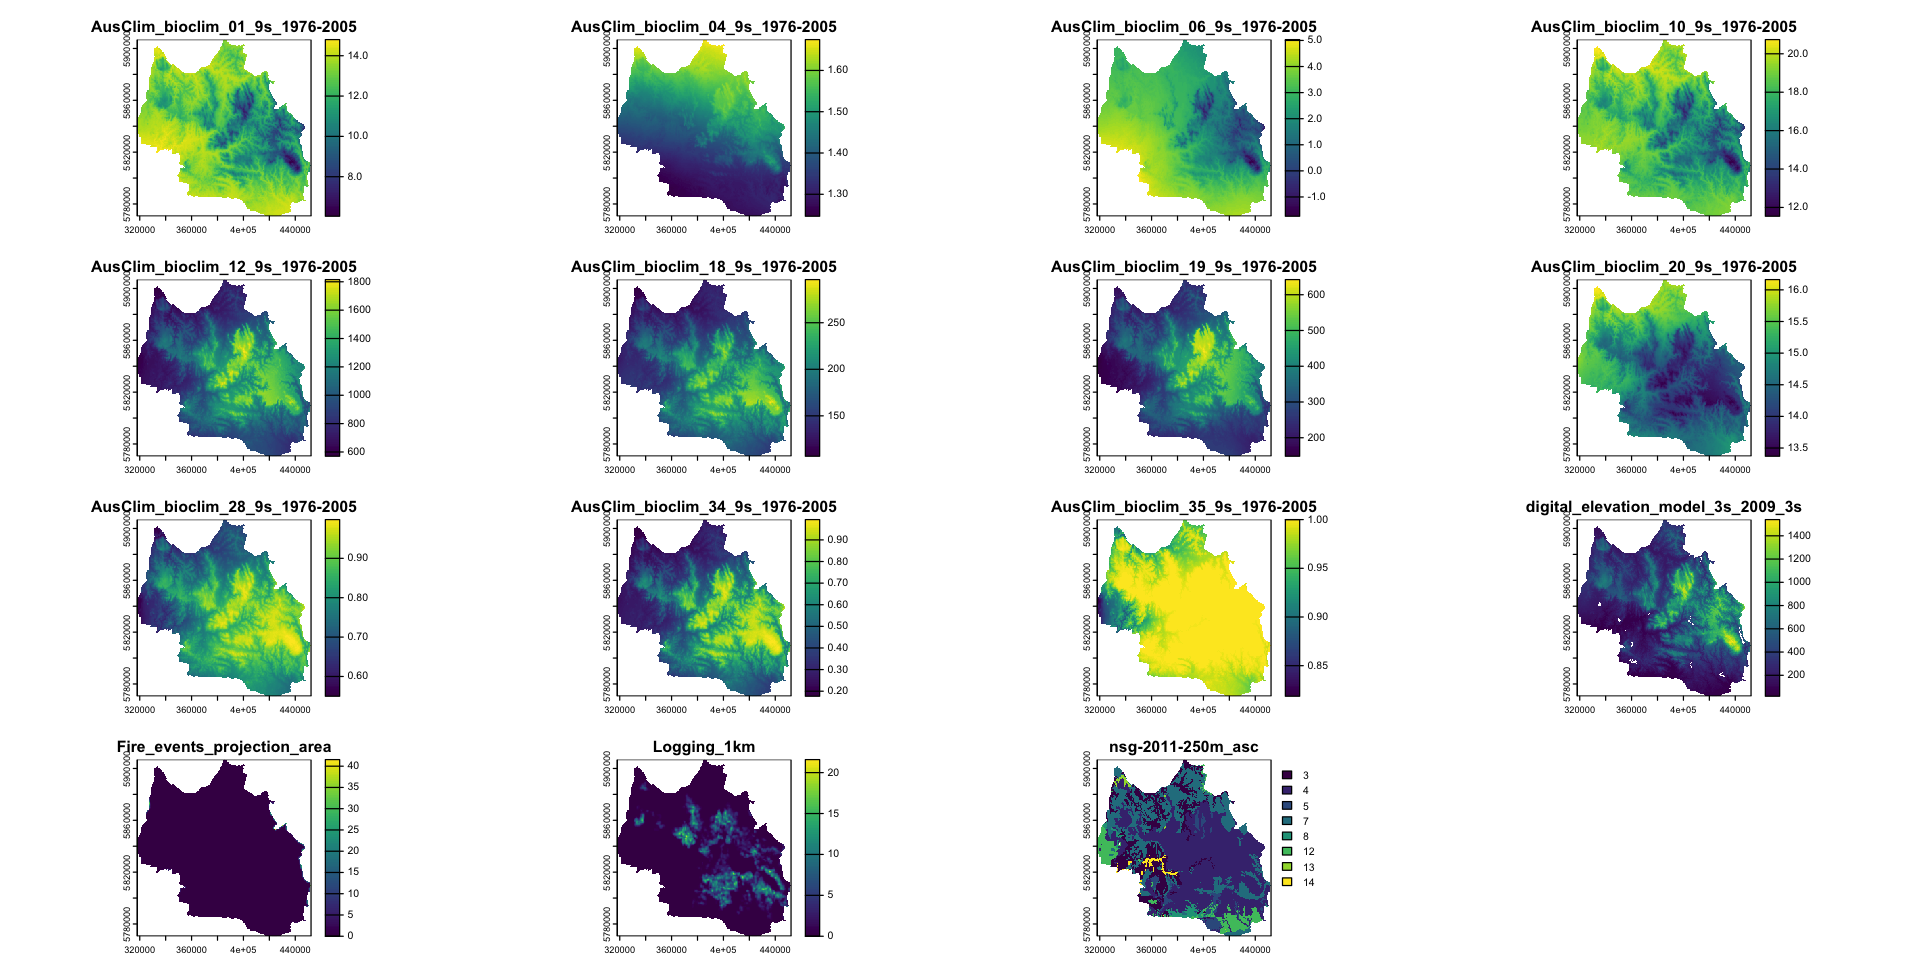

In [21]:
## {r stack_save_rasters}

# Stack the cropped and masked rasters together
raster_stack <- do.call(c, cropped_masked_rasters)

# Print summary to verify the stack
print(raster_stack)

# Plot each layer to visually verify the raster stack
plot(raster_stack)


In [22]:
## {r save_tiff}

# Save the raster stack to a GeoTIFF file
writeRaster(raster_stack, filename = "stacked_central_higlands_raster.tif", overwrite = TRUE)


Congratulations, now you have learnt how to:

1.  Reproject CRS of raster files and shapefiles.
2.  Check and unify resolution of rasters by resampling.
3.  Also, you know the resampling methods for both categorical and continuous rasters.
4.  Crop and mask rasters
5.  Stack rasters and save stacked rasters.

![](https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site/main/images/EC_section_break.png)

EcoCommons received investment (<https://doi.org/10.3565/chbq-mr75>) from the Australian Research Data Commons (ARDC). The ARDC is enabled by the National Collaborative Research Infrastructure Strategy (NCRIS).

::: {align="center"}
**Our partner**
:::

![](https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site/main/images/partners_logos.png)

# **How to Cite EcoCommons**

If you use EcoCommons in your research, please cite the platform as follows:

> EcoCommons Australia 2024. *EcoCommons Australia – a collaborative commons for ecological and environmental modelling*, Queensland Cyber Infrastructure Foundation, Brisbane, Queensland. Available at: <https://data–explorer.app.ecocommons.org.au/> (Accessed: MM DD, YYYY). <https://doi.org/10.3565/chbq-mr75>

You can download the citation file for EcoCommons Australia here: [Download the BibTeX file](reference.bib)